Symulacje Komputerowe - Raport
==============

**Autorzy:** *Dworaczyk Marek*, *Czech Piotr* i *Oliwier Arent*

<br><br>

# Spis treści

0. Wprowadzenie
1. Zadanie nr 1: Generator ACORN (Additive Congruential Random Number) <br>
1.1. Treść zadania <br>
1.2. Rozwiązanie <br>
2. Zadanie nr 2: Generowanie rozkładu normalnego <br>
2.1. Treść zadania <br>
2.2. Rozwiązanie <br>
3. Zadanie nr 3: Metody redukcji wariancji <br>
3.1. Treść zadania <br>
3.2. Rozwiązanie <br>
4. Zadanie nr 4: Warunkowa wartość oczekiwana <br>
4.1. Treść zadania <br>
4.2. Rozwiązanie <br>
5. Zadanie nr 5: Czas ruiny <br>
5.1. Treść zadania <br>
5.2. Rozwiązanie <br>
6. Zadanie nr 6: Prawa arcusa sinusa <br>
6.1. Treść zadania <br>
6.2. Rozwiązanie <br>

<br><br>

# Wprowadzenie

Całość naszego projektu podczas rozwiązania wykorzystuje podstawowe pakiety matematyczne, które zaimportujemy:

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import random

from scipy.special import lambertw
from scipy.special import erfinv
from scipy.stats import poisson
from scipy.stats import pearsonr
from scipy.stats import norm

Dodatkowo w ramach tworzenia i testowania raportu na własnych maszynach / maszynie Czytającego ustawimy stałe ziarno losowości, aby praca zaprezentowana była dla każdego w ten sam sposób

In [2]:
np.random.seed(2024)

Nie wiem czy chcemy coś konkretnego tu jeszcze powiedzieć, ale kolejna linijka wycisza wszystkie niepotrzebne ostrzeżenia

In [55]:
warnings.filterwarnings('ignore') 

# Zadanie 1: 

## Treść zadania

Lorem ipsum

<br>

## Rozwiązanie


Generator ACORN k-tego rzędu oparty jest na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne:

$$
X^0_n = X^0_{n-1}, \quad n \geq 1
$$

$$
X^m_n = (X^{m-1}_n + X^m_{n-1}) \mod M, \quad m = 1, \ldots, k, \quad n \geq 1
$$

$$
Y^k_n = \frac{X^k_n}{M}, \quad n \geq 1
$$

Poniżej znajduje się implementacja tego algorytmu, wykresy rozpatrywanych funkcji, histogramy oraz porównanie wydajności z wbudowanym generatorem "numpy".

In [4]:
def ACORN(N, k, M, Lag, seed):
    """
    Funkcja ACORN generuje N pseudolosowych liczb z przedziału (0, 1) 
    wykorzystując algorytm bazujący na metodzie lagged Fibonacci generator (LFG).

    Parametry:
    N (int): Liczba pseudolosowych liczb do wygenerowania.
    k (int): Wymiar tablicy X.
    M (int): Modulo, które określa maksymalną wartość liczb w tablicy X.
    Lag (int): Liczba początkowych wartości do pominięcia (lag).
    seed (int): Początkowa wartość, ziarno, które musi być względnie pierwsze z M.

    Zwraca:
    list: Lista N wygenerowanych pseudolosowych liczb z przedziału (0, 1).
    """

    def gcd(a, b):
        """
        Funkcja oblicza największy wspólny dzielnik (GCD) dwóch liczb a i b 
        przy użyciu algorytmu Euklidesa.

        Parametry:
        a (int): Pierwsza liczba.
        b (int): Druga liczba.

        Zwraca:
        int: Największy wspólny dzielnik (GCD) a i b.
        """
        while b:
            a, b = b, a % b
        return a

    
    assert gcd(seed, M) == 1

    # Inicjalizacja dwuwymiarowej listy X
    X = [[0] * (k + 1) for _ in range(Lag + N + 1)]
    X[0][0] = seed

    # Generowanie wartości z pominięciem pierwszych Lag
    for n in range(1, Lag + N + 1):
        X[n][0] = X[n - 1][0]
        for m in range(1, k + 1):
            X[n][m] = (X[n - 1][m] + X[n][m - 1]) % M

    # Obliczanie wartości Y dla następnych N wartości po pominięciu Lag
    Y = [X[n + Lag][k] / M for n in range(1, N + 1)]
    
    return Y


# Parametry
N = 1000
k = 9
M = 2**89 - 1
Lag = 1000
seed = 1234567  

# Generowanie liczb pseudolosowych przy użyciu ACORN
start_time = time.time()
random_numbers_acorn = ACORN(N, k, M, Lag, seed)
acorn_time = time.time() - start_time

# Generowanie liczb pseudolosowych przy użyciu numpy
start_time = time.time()
numpy_random_numbers = np.random.random(N)
numpy_time = time.time() - start_time




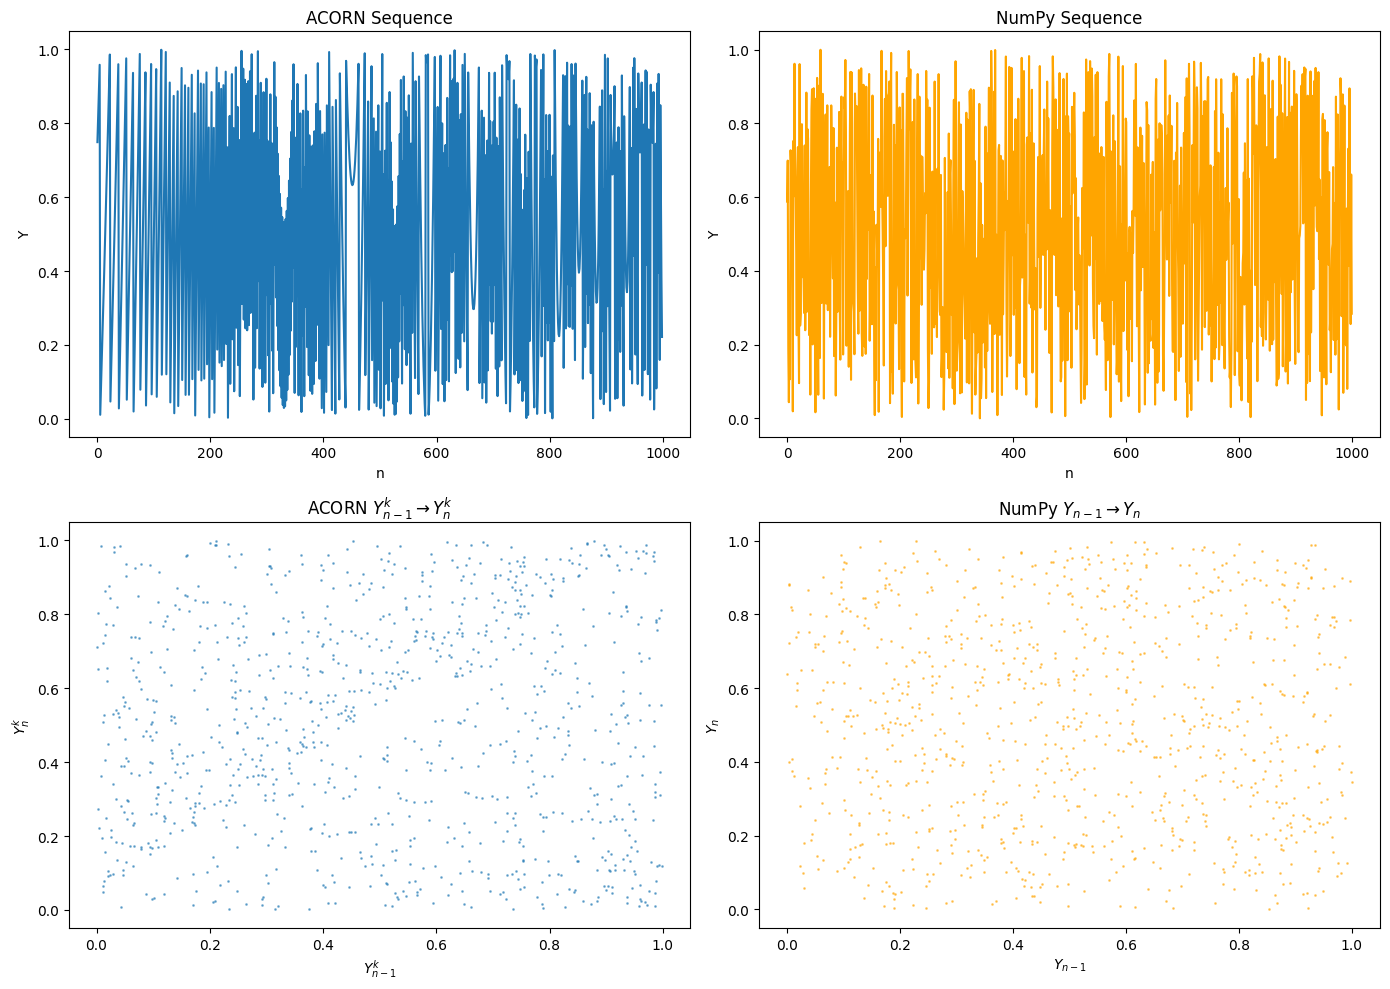

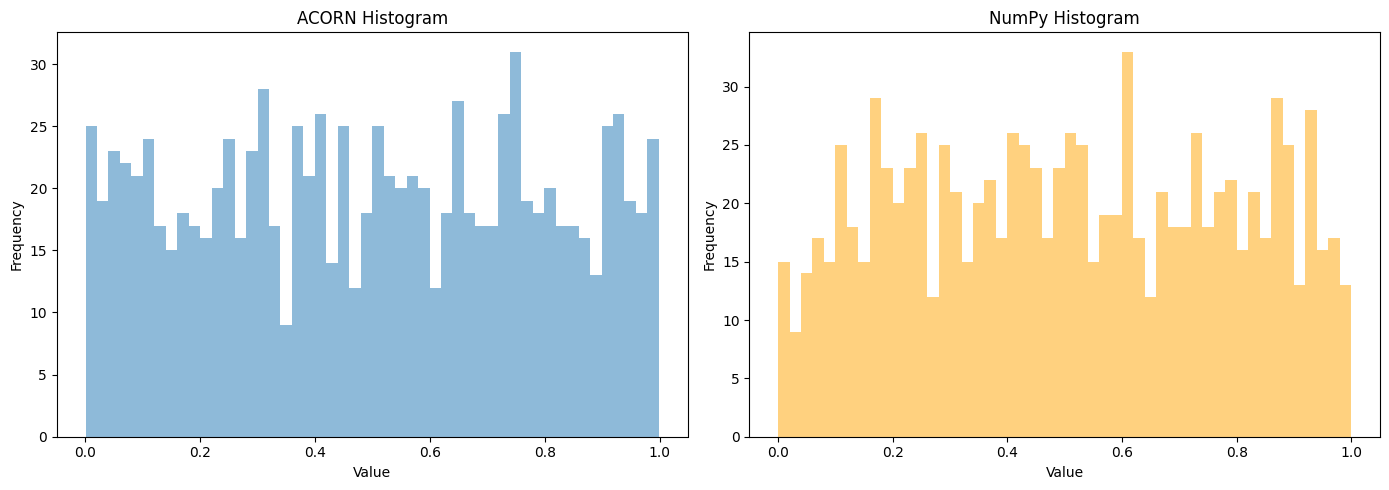

ACORN generation time: 0.000000 seconds
Numpy generation time: 0.015664 seconds


In [5]:
# Wykresy
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Wykres ciągu Y_n^k dla ACORN
axs[0, 0].plot(random_numbers_acorn, label='ACORN Generated Numbers')
axs[0, 0].set_title('ACORN Sequence')
axs[0, 0].set_xlabel('n')
axs[0, 0].set_ylabel('Y')

# Wykres ciągu Y_n^k dla NumPy
axs[0, 1].plot(numpy_random_numbers, label='NumPy Generated Numbers', color='orange')
axs[0, 1].set_title('NumPy Sequence')
axs[0, 1].set_xlabel('n')
axs[0, 1].set_ylabel('Y')

# Wykres funkcji Y_{n-1}^k -> Y_n^k dla ACORN
axs[1, 0].scatter(random_numbers_acorn[:-1], random_numbers_acorn[1:], alpha=0.5, s=1)
axs[1, 0].set_title('ACORN $Y_{n-1}^k \\rightarrow Y_n^k$')
axs[1, 0].set_xlabel('$Y_{n-1}^k$')
axs[1, 0].set_ylabel('$Y_n^k$')

# Wykres funkcji Y_{n-1} -> Y_n dla NumPy
axs[1, 1].scatter(numpy_random_numbers[:-1], numpy_random_numbers[1:], alpha=0.5, s=1, color='orange')
axs[1, 1].set_title('NumPy $Y_{n-1} \\rightarrow Y_n$')
axs[1, 1].set_xlabel('$Y_{n-1}$')
axs[1, 1].set_ylabel('$Y_n$')

plt.tight_layout()
plt.show()

# Histogramy
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histogram dla ACORN
axs[0].hist(random_numbers_acorn, bins=50, alpha=0.5, label='ACORN')
axs[0].set_title('ACORN Histogram')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Histogram dla NumPy
axs[1].hist(numpy_random_numbers, bins=50, alpha=0.5, label='Numpy', color='orange')
axs[1].set_title('NumPy Histogram')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Porównanie wydajności
print(f"ACORN generation time: {acorn_time:.6f} seconds")
print(f"Numpy generation time: {numpy_time:.6f} seconds")

Porównanie generatora ACORN z wbudowanym generatorem NumPy pokazuje, że oba generatory produkują liczby losowe o dobrych właściwościach statystycznych. Na wykresach punktowych dla obu generatorów widoczne jest równomierne rozłożenie punktów, co sugeruje brak wyraźnych wzorców i niezależność generowanych wartości. Histogramy dla obu generatorów również pokazują równomierne rozłożenie wartości w przedziale od 0 do 1, z podobnymi wysokościami słupków, co potwierdza równomierność generacji liczb losowych. Jednakże, pod względem wydajności, generator NumPy jest zdecydowanie szybszy, wykonując generowanie w czasie rzędu w przybliżeniu 0 sekund w porównaniu do 0.006994 sekund dla ACORN.


# Zadanie 2: 

## Treść zadania

Lorem ipsum

<br>

## Rozwiązanie


<p style="font-size:20px;">W pierwszym kroku przedstawiam zaimplementowane na zajęciach różnorodane metody generowania rozkładu normalnego. Następnie implementuje dwie dodatkowe: metodę "tuzina" i "zigguratu"</p>

<h1 style="font-size:40px;">Metoda stosunku jednostajnych</h1>

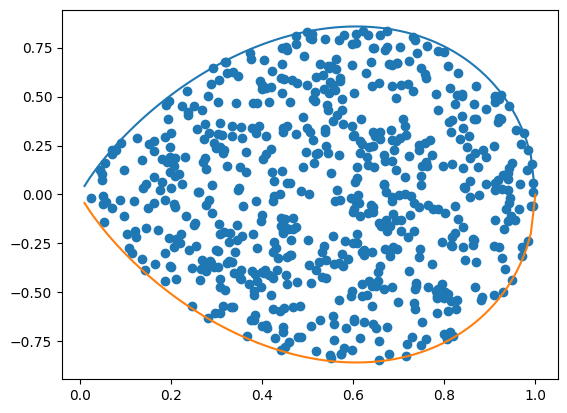

In [6]:
def normal_gen(n):
    # Initialize empty list to store generated samples
    xs=[]
    ys=[]

    # Generate samples
    
    for i in range(n):
        # Generate two uniform random variables in range [-1, 1]
        X = np.random.uniform(0, 1)
        Y = np.random.uniform(-1, 1)
        
        # Calculate squared magnitude
        
        if Y <= 2*X* np.sqrt((np.log(1/X))):
            if Y>= -2*X* np.sqrt((np.log(1/X))): 
                xs.append(X)
                ys.append(Y)
        
    return xs, ys
zs=normal_gen(1000)
plt.scatter(zs[0], zs[1])

x=np.linspace(0,1,100)
y1 = 2*x* np.sqrt((np.log(1/x)))
y2 = -2*x* np.sqrt((np.log(1/x)))
plt.plot(x,y1)
plt.plot(x,y2)

<h1 style="font-size:40px;">Metoda odwrotnej dystrybuanty</h1>

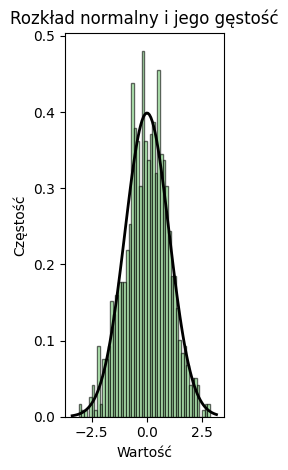

In [7]:
mu_normal = 0
sigma_normal = 1

def inverse_transform_normal(mu, sigma, size=1):
    """
    Generowanie zmiennych losowych o rozkładzie normalnym N(µ,σ^2)
    metodą odwrotnej dystrybuanty.
    
    Parametry:
        mu (float): Średnia rozkładu normalnego.
        sigma (float): Odchylenie standardowe rozkładu normalnego.
        size (int): Liczba zmiennych losowych do wygenerowania.
        
    Zwraca:
        numpy.ndarray: Tablica zmiennych losowych o rozkładzie normalnym.
    """
    u = np.random.uniform(0, 1, size)
    return mu + sigma*np.sqrt(2)*erfinv(2*u-1)

normal_values = inverse_transform_normal(mu_normal, sigma_normal, size=1000)

# Rysowanie histogramu
plt.subplot(1, 3, 2)
count, bins, ignored = plt.hist(normal_values, bins=50, color='lightgreen', edgecolor='black', density=True, alpha=0.6)

# Dodanie krzywej gęstości prawdopodobieństwa
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_normal, sigma_normal)
plt.plot(x, p, 'k', linewidth=2)

title = 'Rozkład normalny i jego gęstość'
plt.title(title)
plt.xlabel('Wartość')
plt.ylabel('Częstość')
plt.tight_layout()
plt.show()

<h1 style="font-size:40px;">Metoda ackeptacji-odrzucenia</h1>

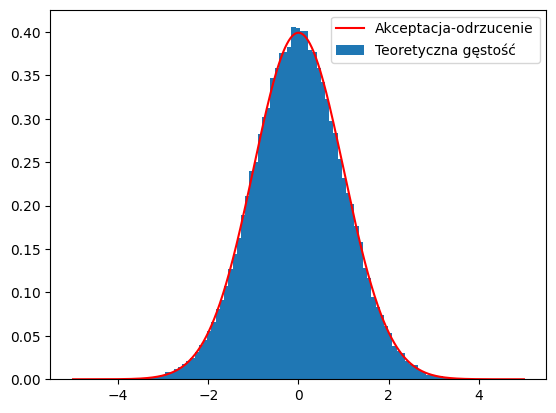

In [8]:
def exp_distribution(lambd=1):
    u = np.random.uniform(0, 1)
    return -1 / lambd * np.log(u)


def half_normal_distribution(c, lambd=1):
    i = 0
    while i == 0:
        y = exp_distribution(lambd)
        u = np.random.uniform(0, 1)
        if u <= abs(1 / (2 * np.pi) * np.exp(-y**2 / 2))/(c * lambd * np.exp(-lambd * y)):
            i += 1
            return y


def normal_distribution(c, n=1000, lambd=1):
    arr = []
    i = 0
    counter = 0
    while i < n:
        counter += 1
        u = random.random()
        if u <= 0.5:
            while u != 1:
                y = exp_distribution(lambd)
                a = np.random.uniform(0, 1)
                if a <= (1 / (2 * np.pi) * np.exp(-(y ** 2) / 2)) / (c * 0.5 * lambd * np.exp(-lambd * y)):
                    u = 1
                    i += 1
                    arr.append(y)
        else:
            while u != 1:
                y = -exp_distribution(lambd)
                p = abs(y)
                a = np.random.uniform(0, 1)
                if a <= (1 / (2 * np.pi) * np.exp(-(p ** 2) / 2)) / (c * 0.5 * lambd * np.exp(-lambd * p)):
                    i += 1
                    u = 1
                    arr.append(y)

    return arr


def normal_dist_density(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)


arr = normal_distribution(1, 100000)
x = np.linspace(-5, 5, 1000)
y = normal_dist_density(x)

plt.hist(arr, density=True, bins=100)
plt.plot(x, y, color='r')
plt.legend(['Akceptacja-odrzucenie', 'Teoretyczna gęstość'], loc="upper right")
plt.show()


<h1 style="font-size:40px;">Metoda biegunowa generowania rozkładu normalnego w wersji Boxa–Mullera oraz Marsaglii</h1>

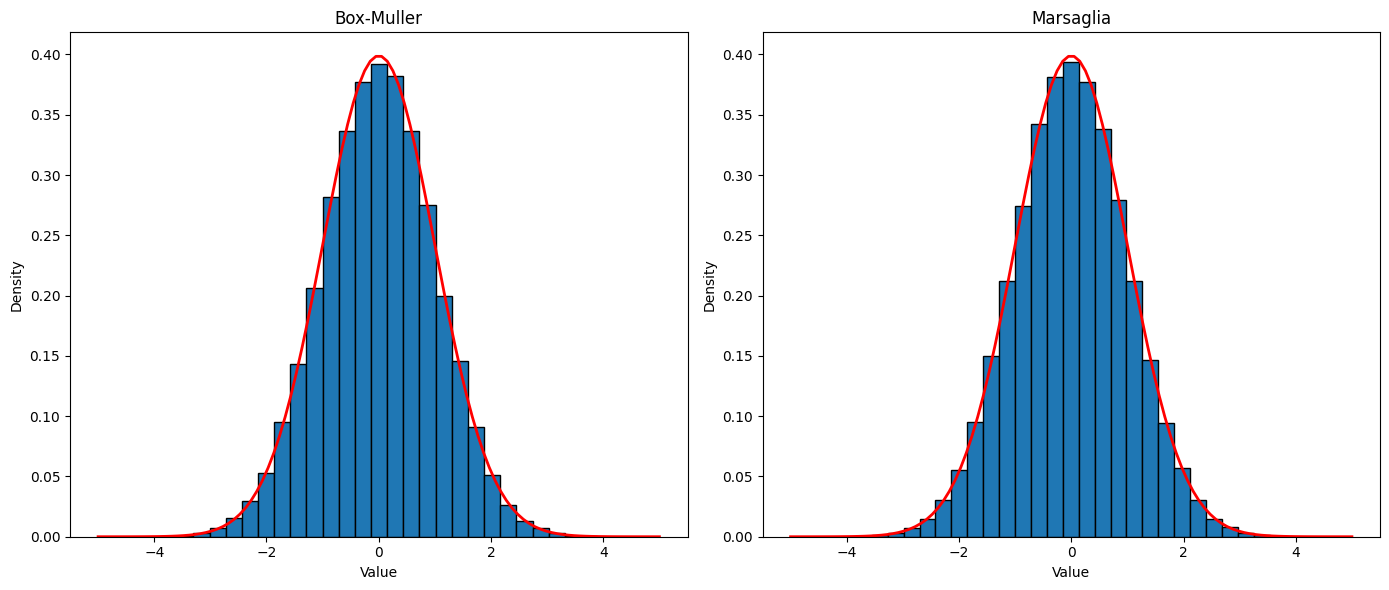

In [9]:
def normal_distribution_BM(samples, loc=0, scale=1):
    # Generate standard normal distributed samples using Box-Muller transform
    U1 = np.random.uniform(0, 1, samples)
    U2 = np.random.uniform(0, 1, samples)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    
    # Apply location and scale transformation
    normal_samples = loc + scale * Z1, loc + scale * Z2
    
    return normal_samples

def normal_distribution_M(samples, loc=0, scale=1):
    Z1_list = []
    Z2_list = []
    while len(Z1_list) < samples:
        U1 = np.random.uniform(-1, 1)
        U2 = np.random.uniform(-1, 1)
        R2 = U1**2 + U2**2
        if R2 < 1:
            Z1 = U1 * np.sqrt(-2 * np.log(R2) / R2)
            Z2 = U2 * np.sqrt(-2 * np.log(R2) / R2)
            Z1_list.append(Z1)
            Z2_list.append(Z2)
    Z1_array = np.array(Z1_list)
    Z2_array = np.array(Z2_list)
    
    # Apply location and scale transformation
    normal_samples = loc + scale * Z1_array, loc + scale * Z2_array
    
    return normal_samples


# Generate normal samples
num_samples = 100000
start_time = time.time()
normal_samples_BM = normal_distribution_BM(num_samples)[0]
end_time = time.time()
BMTime=end_time-start_time

num_samples = 100000
start_time = time.time()
normal_samples_M = normal_distribution_M(num_samples)[0]
end_time = time.time()
MTime=end_time-start_time

# Create histogram
plt.figure(figsize=(14, 6))

# Box-Muller histogram
plt.subplot(1, 2, 1)
plt.hist(normal_samples_BM, bins=30, density=True, edgecolor='black')
x = np.linspace(-5, 5, 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', label='N(0,1)', linewidth=2)
plt.title('Box-Muller')
plt.xlabel('Value')
plt.ylabel('Density')

# Marsaglia histogram
plt.subplot(1, 2, 2)
plt.hist(normal_samples_M, bins=30, density=True, edgecolor='black')
x = np.linspace(-5, 5, 100)
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', label='N(0,1)', linewidth=2)
plt.title('Marsaglia')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()

# Show plot
plt.show()

<p style="font-size:30px;"><strong>Metoda tuzina</strong></p>

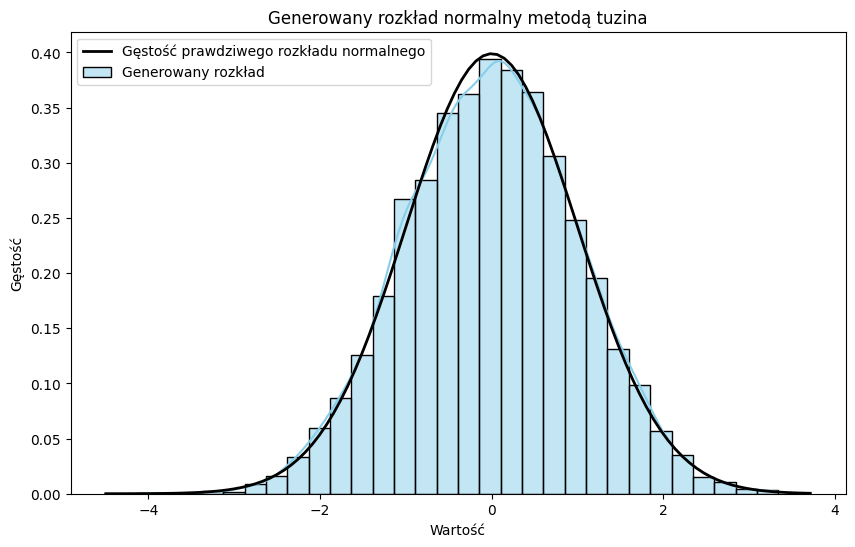

In [10]:
def tuzin_method(n, m, s):
    """
    Generuje pojedynczą liczbę z rozkładu normalnego N(m, s) metodą tuzina.

    Parametry:
    n (int): Liczba liczb pseudolosowych U(0,1).
    m (float): Średnia rozkładu normalnego.
    s (float): Odchylenie standardowe rozkładu normalnego.

    Zwraca:
    float: Liczba z rozkładu normalnego N(m, s).
    """
    U = np.random.uniform(0, 1, n)  # Generowanie n liczb pseudolosowych U(0,1)
    S = np.sum(U)  # Obliczanie sumy S
    X = S - (n / 2)  # Korygowanie sumy S
    Y = s * X + m  # Przekształcenie X w wartość z rozkładu normalnego
    return Y

# Parametry
n = 12  # Liczba liczb pseudolosowych
m = 0  # Średnia rozkładu normalnego
s = 1  # Odchylenie standardowe rozkładu normalnego
num_samples = 10000  # Liczba próbek do wygenerowania

# Generowanie liczb z rozkładu normalnego metodą tuzina
samples = [tuzin_method(n, m, s) for _ in range(num_samples)]

# Rysowanie histogramu i gęstości
plt.figure(figsize=(10, 6))
sns.histplot(samples, kde=True, stat='density', bins=30, color='skyblue', label='Generowany rozkład')

# Rysowanie gęstości prawdziwego rozkładu normalnego
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, m, s)
plt.plot(x, p, 'k', linewidth=2, label='Gęstość prawdziwego rozkładu normalnego')

plt.title('Generowany rozkład normalny metodą tuzina')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.show()

<p style="font-size:30px;"><strong>Metoda zigguratu</strong></p>

Schodki: 8, Liczba wywołań funkcji wykładniczej: 55607
Schodki: 16, Liczba wywołań funkcji wykładniczej: 36398
Schodki: 32, Liczba wywołań funkcji wykładniczej: 27948
Schodki: 64, Liczba wywołań funkcji wykładniczej: 21566
Schodki: 128, Liczba wywołań funkcji wykładniczej: 14771


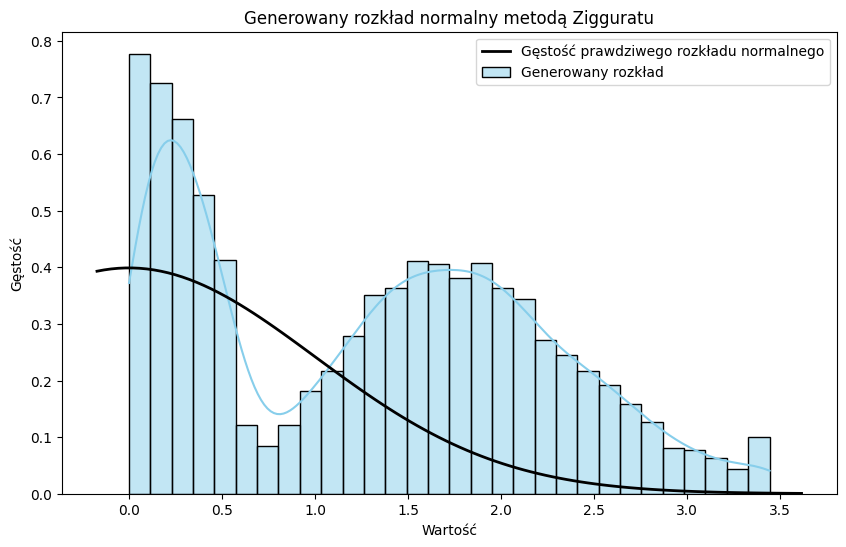

In [11]:
# Stałe dla metody Zigguratu
R = 3.442620
N = 128
V = 9.91256303526217e-3

# Funkcja do inicjalizacji tabeli Zigguratu
def setup_ziggurat():
    x = np.zeros(N + 1)
    y = np.zeros(N)
    
    x[0] = R
    y[0] = np.exp(-0.5 * R * R)
    
    for i in range(1, N):
        x[i] = np.sqrt(-2.0 * np.log(y[i - 1]))
        y[i] = y[i - 1] + V / x[i]
        
    x[N] = 0.0
    return x, y

# Funkcja do generowania zmiennych losowych metodą Zigguratu
def ziggurat_method(x, y):
    while True:
        k = np.random.randint(0, N)
        u = np.random.uniform()
        
        if u < y[k]:
            return u * x[k]
        
        if k == 0:
            while True:
                x0 = -np.log(np.random.uniform()) / x[1]
                y0 = -np.log(np.random.uniform())
                if y0 + y[0] <= 0.5 * x0 * x0:
                    return x0
        else:
            x_ = u * (x[k] - x[k - 1]) + x[k - 1]
            if np.exp(-0.5 * x_ * x_) <= np.exp(-0.5 * x[k] * x[k]):
                return x_

# Funkcja do testowania liczby wywołań funkcji wykładniczej
def test_exponential_calculations(steps, num_samples=10000):
    x, y = setup_ziggurat()
    exp_calls = 0
    np.random.seed(42)
    
    for _ in range(num_samples):
        k = np.random.randint(0, steps)
        u = np.random.uniform()
        
        if u >= y[k]:
            exp_calls += 1
            if k == 0:
                while True:
                    x0 = -np.log(np.random.uniform()) / x[1]
                    exp_calls += 1
                    y0 = -np.log(np.random.uniform())
                    exp_calls += 1
                    if y0 + y[0] <= 0.5 * x0 * x0:
                        break
            else:
                exp_calls += 1
    
    return exp_calls

# Test dla różnych liczby schodków
step_counts = [8, 16, 32, 64, 128]
results = {}

for steps in step_counts:
    exp_calls = test_exponential_calculations(steps)
    results[steps] = exp_calls

# Wyświetlanie wyników
for steps, calls in results.items():
    print(f"Schodki: {steps}, Liczba wywołań funkcji wykładniczej: {calls}")

# Generowanie próbek za pomocą metody Zigguratu
x, y = setup_ziggurat()
num_samples = 10000
samples = [ziggurat_method(x, y) for _ in range(num_samples)]

# Rysowanie histogramu i gęstości
plt.figure(figsize=(10, 6))
sns.histplot(samples, kde=True, stat='density', bins=30, color='skyblue', label='Generowany rozkład')

# Rysowanie gęstości prawdziwego rozkładu normalnego
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2, label='Gęstość prawdziwego rozkładu normalnego')

plt.title('Generowany rozkład normalny metodą Zigguratu')
plt.xlabel('Wartość')
plt.ylabel('Gęstość')
plt.legend()
plt.show()

# Zadanie 3: Metody redukcji wariancji 

## Treść zadania

Zapoznaj się z metodami redukcji wariancji w metodach Monte Carlo: https://en.wikipedia.org/wiki/Variance_reduction. W szczególności skupimy się na dwóch metodach:

• metoda odbić lustrzanych https://en.wikipedia.org/wiki/Antithetic_variates

• metoda zmiennej kontrolnej https://en.wikipedia.org/wiki/Control_variates

Krok 1.

Metodą Monte Carlo oblicz całkę
$$
\int _0^1 \frac{4}{1+x^2}dx
$$
(szacowanie liczby $\pi$)

Krok 2.

Zastostuj jedną z metod redukcji wariancji do ponownego obliczenia zadanej całki.

Krok 3.

Przedstaw analizę błędu względem ilości symulacji w formie tabeli lub wykresu.

<br>

## Rozwiązanie


Zastosujemy metodę odbić lustrzanych, by zmniejszyć wariancję generowanych prób przy obliczaniu następującej całki za pomocą metody Monte Carlo:
$$
\int_0^1 \frac{4}{1+x^2} dx.
$$
W celu obliczenia tej całki generujemy liczbę X z rozkładu jednostajnego na przedziale $[0,1]$. Następnie liczbę tą wstawiamy w funkcję $f$ zawartą w całce. Proces ten powtarzamy $n$ razy, przez co otrzymamy wektor $v$. Ostatecznie obliczamy średnią z wszystkich otrzymanych wyników, która w przybliżeniu da nam wynik całki. Wariancją tej metody będzie odchylenie standardowe wektora $v$ podzielona przez $\sqrt{2n}$. Zdefiniujemy funkcje potrzebne do obliczenia tej wariancji:


In [12]:
def f(x):
    """ 
    Integral function
    """
    return 4/(1+x**2)



Metoda odbić lustrzanych polega na tworzeniu dodatkowej liczby losowej, -X, przy losowaniu z rozkładu jednostajnego. Otrzymujemy wtedy dwie liczby, które są od siebie zależne. Reszta kroków jest taka sama jak w metodzie Monte Carlo, jednak musimy wylosować jedynie $\frac{n}{2}$ liczb. Znacząca różnica występuje przy liczeniu wariancji, gdyż w tym przypadku wyniki są parami zależne oraz dla każdej pary należy zastosować wzór: $\\$
Niech  $Y = -X$, zatem 
$$
Var(X+Y) = \frac{Var(X) + Var(Y) + 2Cov(X,Y)}{4}
$$
Kowariancja między $X$, a $-X$ jest ujemna, zatem całkowita wariancja będzie zmniejszona.

In [13]:
def mirror(n):
    """
    Calculates the integral using the antithetic variates method 
    """
    u1 = np.random.random(n)
    u2 = 1 - u1

    f_u1 = f(u1)
    f_u2 = f(u2)
    f_u = (f_u1+f_u2)/2
    return f_u


Sposób zmiennej kontrolnej

In [14]:
def g(x):
    """The control variate"""
    return 1+x**2

def control(n):
    """
    Calculates the integral using the Control variates method
    """
    tau = 4/3 #analityczny wynik całki / wartość oczekiwana g(U) 
    
    u = np.random.random(n)

    probe_f = f(u)
    probe_g = g(u)

    covariance = np.cov(probe_f,probe_g)[0][1]

    c = -1*covariance/np.var(probe_g)
    return probe_f+c*(probe_g-tau)

Prezentacja metod na violin plocie

In [15]:
n=1500
est1 = f(np.random.random(2*n))
print(np.mean(est1),np.var(est1))
est2 = control(2*n)
print(np.mean(est2),np.var(est2))
est3 = mirror(n)
print(np.mean(est3),np.var(est3))

3.1513317577262034 0.41542848686465506
3.1412507407763175 0.012627685098726
3.1409571114647576 0.0034119725336793443


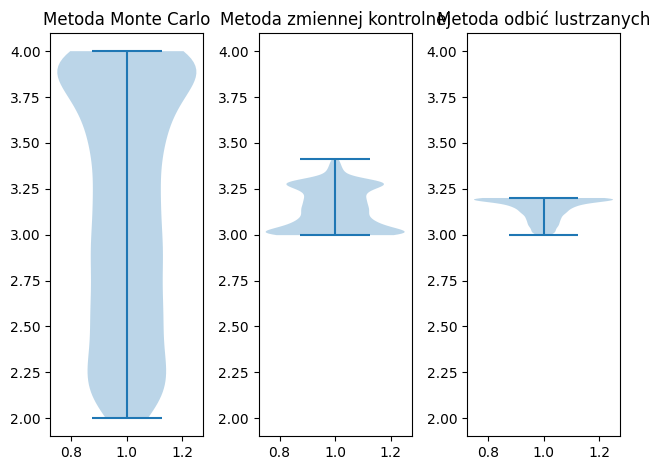

In [16]:
plot1 = plt.subplot2grid((1,3),(0,0))
plt.violinplot(est1)
plot1.set_title("Metoda Monte Carlo")
plot2 = plt.subplot2grid((1,3),(0,1))
plt.violinplot(est2)
plot2.set_title("Metoda zmiennej kontrolnej")
plot2.set_ylim(plot1.get_ylim())
plot3 = plt.subplot2grid((1,3),(0,2))
plt.violinplot(est3)
plot3.set_title("Metoda odbić lustrzanych")
plot3.set_ylim(plot1.get_ylim())
plt.tight_layout()

Chcielibyśmy przedstawić różnicę pomiędzy tymi dwoma metodami, dlatego obliczyliśmy wariancję każdej metody przy zmieniającej się wielkości wektora prób losowych, zaczynając od 100 i kończąc na 1000 z krokiem co 100.

100


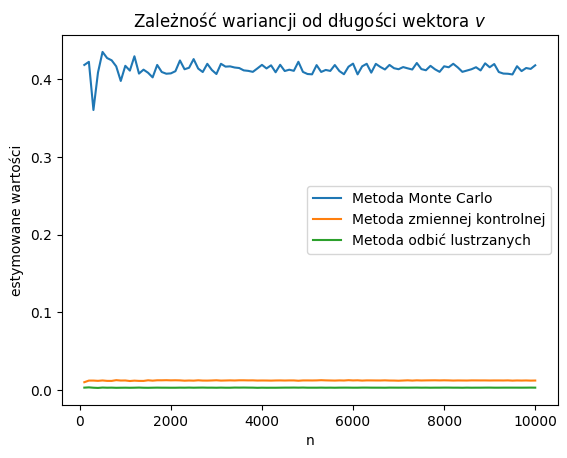

In [17]:
sample_sizes = np.arange(1,101)*100
print(sample_sizes[0])
estims1=np.zeros(100)
estims2=np.zeros(100)
estims3=np.zeros(100)

for i in range(100):
    estims1[i] = np.var(f(np.random.random(sample_sizes[i])))
    estims2[i] = np.var(control(sample_sizes[i]))
    estims3[i] = np.var(mirror(sample_sizes[i]))

plot = plt.subplot()
plt.plot(sample_sizes,estims1, label = "Metoda Monte Carlo")
plt.plot(sample_sizes,estims2, label = "Metoda zmiennej kontrolnej")
plt.plot(sample_sizes,estims3, label = "Metoda odbić lustrzanych")
plot.set_xlabel("n")
plot.set_ylabel("estymowane wartości")
plt.title("Zależność wariancji od długości wektora $v$")
plt.legend()
plt.show()

Na wykresie można zauważyć, że znacząca różnica pomiędzy tymi metodami leży przy wektorach o mniejszej długości. Niżej przedstawilismy tą różnicę także za pomocą violinplot'a, który lepiej podkreśla różnicę pomiędzy wariancją obydwu metod.

# Zadanie 4: Warunkowa wartość oczekiwana 

## Treść zadania

Wartość oczekiwana f(X) zmiennej Y warunkowanej zmienną X ma bardzo ciekawą interpretację, mianowicie spełnia własność

$$
E(Y|X\ =\ x)\ =\ f(x)\ =\ \arg \min_g E ((Y - g(X))^2).
$$

Oznacza to, że E (Y |X) to najlepsze przybliżenie w sensie $L^2$ zmiennej $Y$ korzystające z danych pochodzących ze zmiennej $X$. Sprawdź symulacyjnie następujące stwierdzenia

- <b>a.</b> Jeśli $X$,$Y$ są zmiennymi niezależnymi a $E(Y) = 0$, to dla $Z = XY + \sin X$ zachodzi $E(Z|X) = \sin X$. Jako przykład zaprezentujemy $X$, $Y$ iid ~ $N(0,1)$. Zrób scatterplot $X → E(Z|X)$ wysymulowanych wartości i zaznacz na nim wartości estymowane oraz teoretyczne $E(Z|X)$.

-  <b>b.</b> Gdy $N$ jest procesem Poissona o intensywnosci $\lambda$, to dla $T \ge t \ge 0$ zachodzi $E(N_t|N_T) = \frac{tN_T}{T}$. Oznacza to, że np. zakładając przybywanie klientów do sklepu zgodnie z procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w chwili $T$ (czyli $N_T$), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili $t \lt T$ równej $N_t$ jest $\frac{tN_T}{T}$. Jako przykład możesz wziąć np. $T = 1$, $\lambda = 10$ (zależnie od
metody, niekoniecznie potrzebujesz parametru intensywności). Zrób wykres $t → E(N_t|N_T)$ dla kilku możliwych realizacji $N_T$ i zaznacz na nim wartości estymowane.

- <b>c.</b> Gdy $N$ jest procesem Poissona o intensywnosci $\lambda$, to dla $t \ge s \ge 0$ zachodzi $E(N_t|F_s) = N_s + \lambda(t −s)$, gdzie $F_s$ to filtracja naturalna procesu $N_s$. Oznacza to, że np. zakładając przybywanie klientów do sklepu zgodnie z procesem Poissona i mając dane na temat dotychczasowej ilości klientów w sklepie w każdej chwili $\omega$ spełniającej $0 \ge ω \ge s$ (czyli $F_s$), to najlepszym przybliżeniem dotychczasowej chwili klientów w chwili $t \ge s$ jest $N_s + \lambda (t−s)$. Jako przykład możesz wziąć np. $s = 1$, $\lambda = 10$. Zrób wykres $t → E(N_t|F_s)$ dla kilku możliwych realizacji $N_s$, $s \ge t$, i zaznacz na nim wartości estymowane. Podpowiedź: Wygeneruj kilka trajektorii $N_\omega$, $\omega \ge s$ i wybierz z nich te, które przybierają różne wartości $N_s$ (w tym kroku nie potrzebowałeś użycia parametru intensywności). Następnie skorzystaj z własności Markowa i dla każdej z wybranych realizacji $N_\omega$, $\omega \ge s$ dosymuluj trajektorie $N_\omega$ dla $s \gt \omega \ge t$, za pomocą których wyestymuj $E(N_t|F_s)$.

<br>

## Rozwiązanie


### Ad. a.

Zadanie to rozpoczniemy od  wygerowania unikalnych $X$ ~ $N(0,1)$ 

In [18]:
n = 200
M = 2_000

In [19]:
X = []

while len(X) != n:
    X = np.random.normal(0, 1, n)
    X = list(set(X)) 
    X = sorted(X)

    n = len(X)

Przygotowaliśmy sobie zestaw unikalnych parametrów $X$, ponieważ podczas obliczania $E(Z|X)$ to $X$ będzie wartością nam znaną wedle której wygenerujemy zestaw "zetek".

Dlatego teraz przejdziemy przez każdą unikalną wartość $X$ i wygenerujemy dla niej $M$ razy wartość $Z|X$.

In [20]:
Z_based_on_X = {}

for x_i in X:
    Z_based_on_X[x_i] = np.zeros(M)

    for i in range(M):
        Y = np.random.normal(0, 1)

        Z_i = x_i * Y + np.sin(x_i) # Z = XY + sin(X)
        Z_based_on_X[x_i][i] = Z_i

Z_based_on_X_sorted = dict(sorted(Z_based_on_X.items()))


Wyświetlmy dane, które udało nam się uzyskać

In [21]:
x_plot_values = np.zeros(n * M)
y_plot_values = np.zeros(n * M)

index_for_scatter = 0

for x_i in Z_based_on_X_sorted:
    for y_i in Z_based_on_X_sorted[x_i]:
        x_plot_values[index_for_scatter] = x_i
        y_plot_values[index_for_scatter] = y_i

        index_for_scatter += 1

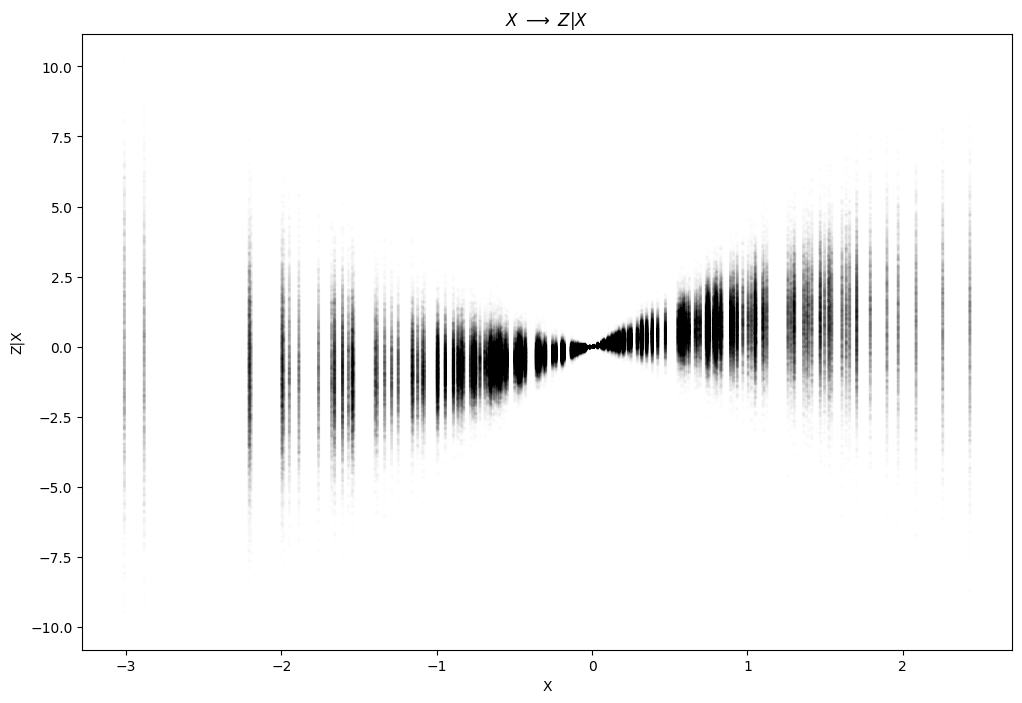

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(x_plot_values, y_plot_values, alpha=0.01, facecolors='none', edgecolors='black', s=2)
plt.title('$X$ $\\longrightarrow$ $Z|X$')
plt.xlabel('X')
plt.ylabel('Z|X')
plt.show()

Na tak przygotowanej "chmurze" danych chcielibyśmy zweryfikować empirycznie podaną własnosć, dla tego konkretnego przypadku $E(Z|X) = \sin X$.

Przygotujmy najpierw empirycznie obliczone wartości $E(Z|X)$ używając średniej jako estymatora.

In [23]:
expected_values_x = np.zeros(n)
expected_values_y = np.zeros(n)

index_for_expected_values = 0

for x_i in Z_based_on_X_sorted:

    expected_value_for_x_i = np.mean(Z_based_on_X_sorted[x_i]) 

    expected_values_x[index_for_expected_values] = x_i
    expected_values_y[index_for_expected_values] = expected_value_for_x_i

    index_for_expected_values += 1

I tak obliczony zestaw danych porównajmy na wykresie wraz z wskazanym rozwiązaniem teoretycznym

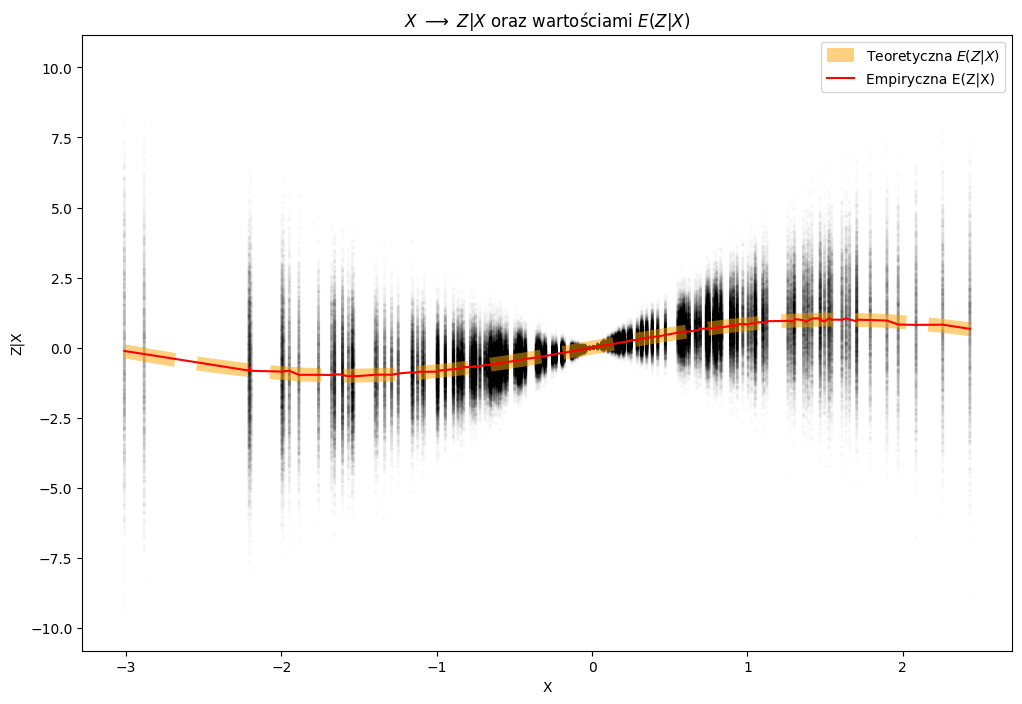

In [24]:
x_min, x_max = np.min(X), np.max(X)
x_range = np.linspace(x_min, x_max, n)

plt.figure(figsize=(12, 8))
plt.scatter(x_plot_values, y_plot_values, alpha=0.01, facecolors='none', edgecolors='black', s=2)
plt.plot(x_range, np.sin(x_range), '--', linewidth=10, c='orange', label="Teoretyczna $E(Z|X)$", alpha=0.5)
plt.plot(expected_values_x, expected_values_y, c='red', label="Empiryczna E(Z|X)")

plt.title('$X$ $\\longrightarrow$ $Z|X$ oraz wartościami $E(Z|X)$')
plt.xlabel('X')
plt.ylabel('Z|X')

plt.legend()
plt.show()


### Ad. b

#### Proces poissona

Implementacje tego zadania rozpoczniemy od przygotowania funkcji do generowania procesu poisonna. W celi uzyskania zestawu $N_t$ wykorzystamy algorytm:

1. Wygeneruj $k \sim Pois(\lambda t)$.
2. $N_t = U \cdot T$, gdzie $U$ to wektor $n$ elementowy $\sim U([0, 1]) \cdot T$
3. Posortuj $N_t$ rosnąco.

<b>Uwaga!</b> Zauważmy tutaj, że zgodnie z treścią naszego zadania znana jest nam aktualna liczba klientów $N_T$ - w takim razie każdy generowany przez nas proces Poissona powinien mieć $k = N_T$, zatem możemy uprościć nasz algorytm:

1. Weź $k = N_T$.
2. $N_t = U \cdot T$, gdzie $U$ to wektor $n$ elementowy $\sim U([0, 1]) \cdot T$
3. Posortuj $N_t$ rosnąco.

In [25]:
def get_poisson(T, k):
    T_prime = np.random.uniform(1, 0, k) * T
    T_prime = np.sort(T_prime)
    
    return T_prime

Następnie, żeby zrealizować zadanie musimy ustawić podstawowe dane algorytmu. Dzięki implementacji generowania procesu Poissona bez wykorzystania parametru $\lambda$ nie musimy go przechowywać w naszym kodzie.

In [26]:
T = 1
N_T = 40

monte_carlo_steps_count = 100
time_steps_count = 1_000
time_range = np.linspace(0, T, time_steps_count)

Przy okazji inicjalizacji zadania i definiowania funkcji generującej proces Poissona - zdefiniujemy funkcję pomocniczą do tworzenia ładnych wykresów procesu Poissona

In [27]:
def plt_poisson_steps(N_t, T, c='blue', alpha=1, x0=0, y0=0):
    x_i = [x0]
    y_i = [y0]

    for i in range(len(N_t)):
        x_i.append(N_t[i])
        y_i.append(y_i[-1] + 1)

        plt.vlines(x=x_i[-1], ymin=y_i[-1] - 1, ymax=y_i[-1], linestyles='dotted', linewidth=2, color=c, alpha=alpha)
        plt.hlines(y=y_i[-2], xmin=x_i[-2], xmax=x_i[-1], linewidth=2, color=c, alpha=alpha)
        plt.scatter(x=[x_i[-1]], y=[y_i[-2]], facecolors='none', edgecolors=c, s=40, alpha=alpha)
        plt.scatter(x=[x_i[-1]], y=[y_i[-1]], c=c, s=40, alpha=alpha)

    plt.hlines(y=y_i[-1], xmin=x_i[-1], xmax=T, linewidth=2, color=c, alpha=alpha)
    plt.scatter(x=[T], y=[y_i[-1]], c=c, s=40, alpha=alpha)

Naszym aktualnym zadanie pozostaje wygenerowanie z pomocą metody Monte Carlo wielu procesów Poissona, których $k = N_T$. Tak stworzone procesy zapiszemy w formie 2 wymiarowej tablicy `czas x ilość_klientów`, aby w późniejszych krokach wygodnie obliczyć wartości estymowane $E(N_t|N_T)$. Całość zaimplementujemy w następujący sposób:

<table>
  <caption>
    Schemat zapisu zmiennaej clients_over_time_per_simulation
  </caption>
  <tr>
    <th scope="row">Czas (t)</th>
    <td>0</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row">Suma klientów (nr sym 1.)</th>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row">Suma klientów (nr sym 2.)</th>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row">Suma klientów (nr sym ...)</th>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>...</td>
  </tr>
</table>


In [28]:
def get_clients_over_time_per_simulation(T, N_T, monte_carlo_steps_count):
    clients_over_time_per_simulation = {} # (time_step) key -> (value) value

    for t in time_range:
        clients_over_time_per_simulation[t] = np.zeros(monte_carlo_steps_count)

    for index in range(monte_carlo_steps_count):
        N_t = get_poisson(T, N_T)

        total_clients = 0
        currently_checked_N_t = 0

        for t in time_range:
            while (
                currently_checked_N_t < len(N_t)
                and N_t[currently_checked_N_t] <= t
            ):
                total_clients += 1
                currently_checked_N_t += 1
            
            clients_over_time_per_simulation[t][index] = total_clients
    
    return clients_over_time_per_simulation

Z tak przygotowanymi danymi możemy obliczyć estymowaną wartość $E(N_T|N_t)$:

<table>
  <caption>
    Obliczanie estymowanej wartości
  </caption>
  <tr>
    <th scope="row">Czas (t)</th>
    <td>0</td>
    <td>0.1</td>
    <td>0.2</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row" style="font-weight: normal">Suma klientów (nr sym 1.)</th>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row" style="font-weight: normal">Suma klientów (nr sym 2.)</th>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row" style="font-weight: normal">Suma klientów (nr sym 3.)</th>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>...</td>
  </tr>
  <tr>
    <th scope="row">Wartość estymowana (średnia)</th>
    <td>1/3</td>
    <td>3/3</td>
    <td>6/3</td>
    <td>...</td>
  </tr>
</table>


In [29]:
def get_clients_expected_values(clients_over_time_per_simulation, time_steps_count):
    expected_values_x = np.zeros(time_steps_count)
    expected_values_y = np.zeros(time_steps_count)

    index = 0

    for t, total_clients_count in clients_over_time_per_simulation.items():
        expected_values_x[index] = t
        expected_values_y[index] = total_clients_count.mean()

        index += 1
    
    return expected_values_x, expected_values_y


Wygenerujemy zatem zestaw danych przy użyciu posiadanych funkcji

In [30]:
clients_over_time_per_simulation = get_clients_over_time_per_simulation(T, N_T, monte_carlo_steps_count)
expected_values_x, expected_values_y = get_clients_expected_values(clients_over_time_per_simulation, time_steps_count)

i przedstawimy je na wykresie (dla wzrokowców dodajemy parę półprzeźroczystych procesów Poissona, które są generowane podczas metody Monte Carlo w celu lepszego zrozumienia, co dzieje się pod powierzchnią:) )

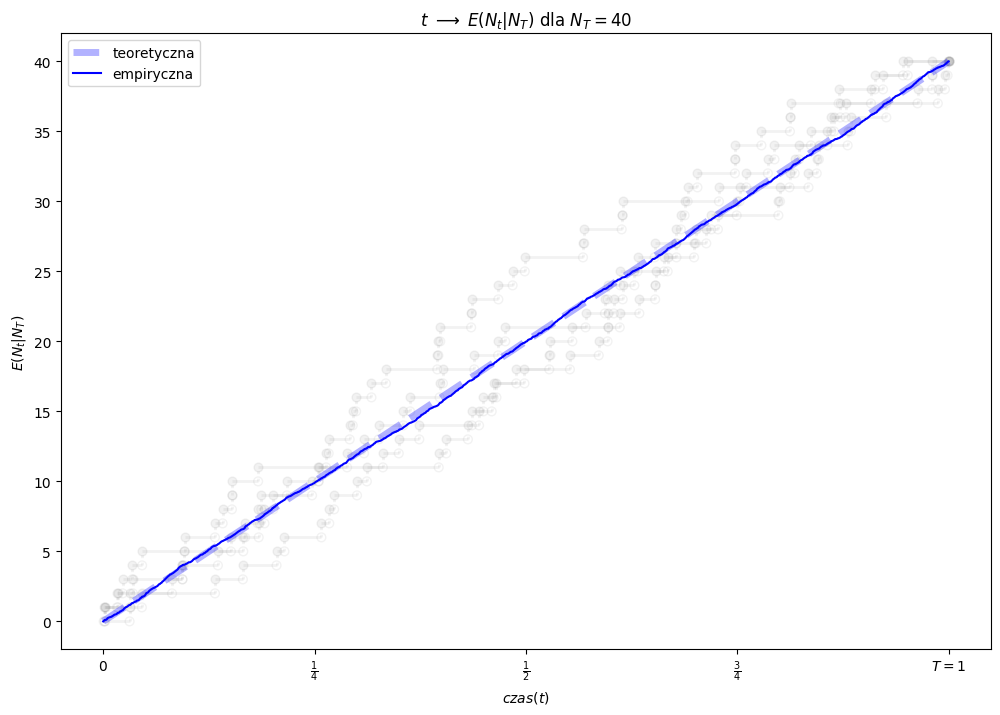

In [31]:
x_min, x_max = np.min(expected_values_x), np.max(expected_values_x)
x_range = np.linspace(x_min, x_max, time_steps_count)

plt.figure(figsize=(12, 8))

for i in range(4):
    plt_poisson_steps(get_poisson(T, N_T), T, alpha=0.1, c='gray')

plt.plot(x_range, (x_range * N_T) / T, '--', linewidth=5, c='blue', alpha=0.3, label="teoretyczna")
plt.plot(expected_values_x, expected_values_y, label="empiryczna", c='blue')

plt.title('$t$ $\\longrightarrow$ $E(N_t|N_T)$ dla $N_T = 40$')
plt.xlabel('$czas (t)$')
plt.xticks([0, 0.25, 0.5, 0.75, 1], ['$0$', '$\\frac{1}{4}$', '$\\frac{1}{2}$', '$\\frac{3}{4}$', '$T = 1$'])
plt.ylabel('$E(N_t|N_T)$')

plt.legend()
plt.show()

Porównajmy rozwiązanie tego zadania dla paru różnych parametrów $N_T$.

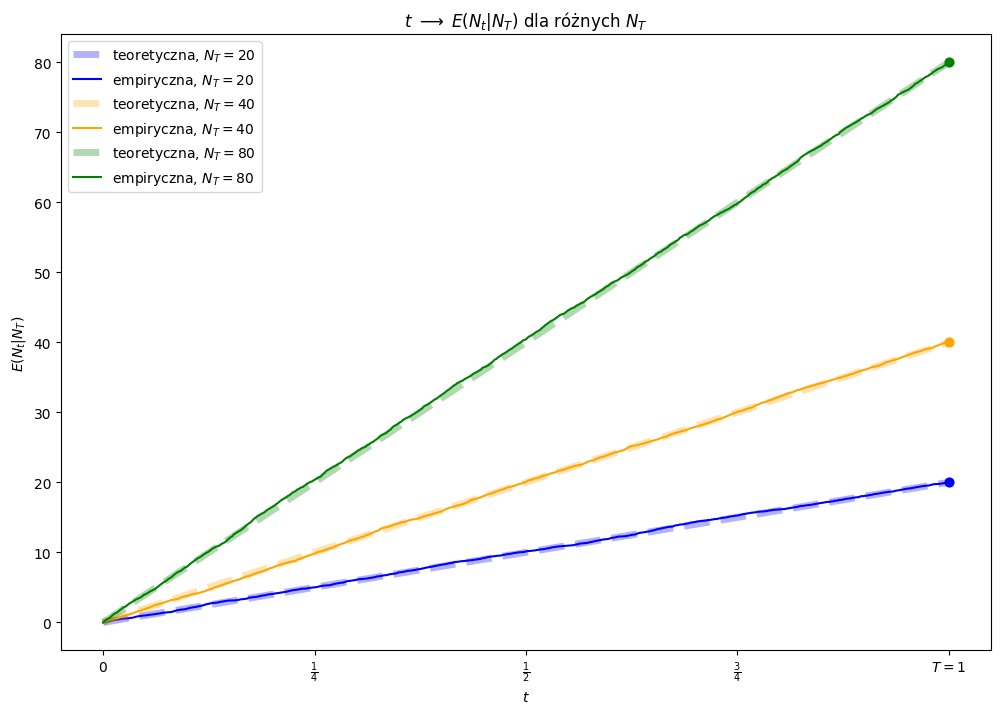

In [32]:
N_Ts = [20, 40, 80]
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(12, 8))

for index, N_T in enumerate(N_Ts):
    clients_over_time_per_simulation = get_clients_over_time_per_simulation(T, N_T, monte_carlo_steps_count)
    expected_values_x, expected_values_y = get_clients_expected_values(clients_over_time_per_simulation, time_steps_count)

    x_min, x_max = np.min(expected_values_x), np.max(expected_values_x)
    x_range = np.linspace(x_min, x_max, time_steps_count)

    plt.plot(x_range, (x_range * N_T) / T, '--', linewidth=5, c=colors[index], alpha=0.3, label=f"teoretyczna, $N_T = {N_T}$")
    plt.plot(expected_values_x, expected_values_y, label=f"empiryczna, $N_T = {N_T}$", c=colors[index])
    plt.scatter([T], [N_T], c=colors[index], s=40)

plt.title('$t$ $\\longrightarrow$ $E(N_t|N_T)$ dla różnych $N_T$')
plt.xlabel('$t$')
plt.xticks([0, 0.25, 0.5, 0.75, 1], ['$0$', '$\\frac{1}{4}$', '$\\frac{1}{2}$', '$\\frac{3}{4}$', '$T = 1$'])
plt.ylabel('$E(N_t|N_T)$')

plt.legend()
plt.show()

### Ad c.


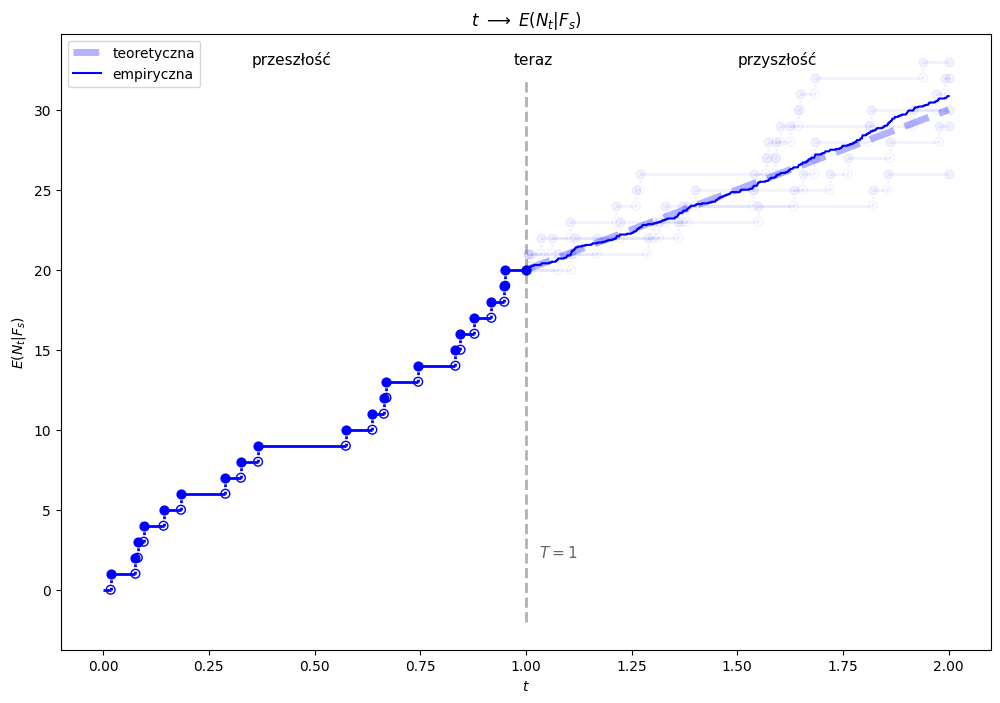

In [33]:
plt.figure(figsize=(12, 8))

def get_poisson(a, b, T, k):
    T_prime = np.random.uniform(a, b, k) * T 
    T_prime = np.sort(T_prime)
    
    return T_prime

T = 1
lambda_value = 10
monte_carlo_steps_count = 20
time_steps_count = 1_000
N_s = 20

F_s = get_poisson(0, T, T, N_s)

time_range = np.linspace(T, 2 * T, time_steps_count)

clients_over_time_per_simulation = {} # (time_step) key -> (value) value

for t in time_range:
    clients_over_time_per_simulation[t] = np.zeros(monte_carlo_steps_count)

expected_values_x = np.zeros(time_steps_count)
expected_values_y = np.zeros(time_steps_count)

# zad 3 z l10 i l11!
for index in range(monte_carlo_steps_count):
    k = poisson.rvs(mu=lambda_value * T)
    N_t = get_poisson(T, 2 * T, T, k)

    if index < 5:
        plt_poisson_steps(N_t, 2 * T, alpha=0.05, x0=T, y0=N_s)

    total_clients = N_s
    currently_checked_N_t = 0

    for t in time_range:
        while (
            currently_checked_N_t < len(N_t)
            and N_t[currently_checked_N_t] <= t
        ):
            total_clients += 1
            currently_checked_N_t += 1
        
        clients_over_time_per_simulation[t][index] = total_clients

index = 0
for t, total_clients_count in clients_over_time_per_simulation.items():
    expected_values_x[index] = t
    expected_values_y[index] = total_clients_count.mean()

    index += 1

x_min, x_max = np.min(expected_values_x), np.max(expected_values_x)
x_range = np.linspace(x_min, x_max, time_steps_count)

plt.vlines(x=T, ymin=0 - 2, ymax=np.max(expected_values_y) + 1, linestyles='dashed', linewidth=2, color='black', alpha=0.3)
plt.text(T * 1.03, 2, f"$T = {T}$", color='black', fontsize=11, alpha=0.6)

plt.text(T * 0.35, np.max(expected_values_y) + 2, f"przeszłość", color='black', fontsize=11)
plt.text(T * 1.5, np.max(expected_values_y) + 2, f"przyszłość", color='black', fontsize=11)
plt.text(T * 0.97, np.max(expected_values_y) + 2, f"teraz", color='black', fontsize=11)

plt_poisson_steps(F_s, T)

# teo
plt.plot(time_range, N_s + lambda_value * (time_range - T), '--', linewidth=5, c='b', alpha=0.3, label="teoretyczna")
# empi
plt.plot(expected_values_x, expected_values_y, label=f"empiryczna", c='blue')

plt.title('$t$ $\\longrightarrow$ $E(N_t|F_s)$')
plt.xlabel('$t$')
plt.ylabel('$E(N_t|F_s)$')

plt.legend()
plt.show()

# Zadanie 5: Czas ruiny

## Treść zadania

Niech $X_t$ będzie procesem ruiny modelu Craméra-Lundberga
$$
X_t = u + ct - \sum ^{N_t}_{i=0}ξ_i
$$
gdzie $t,c,u ≥ 0$, $ξi ∼ Exp(η),$ $ξi ⊥ ξj$ dla $i \ne j$, E (ξi) = η, a $N_t$ jest procesem Poissona o intensywności λ. Czasem
ruiny klasycznej nazywamy zmienną $τ = inf\{t > 0|X_t < 0\}$. Prawdopodobieństwem ruiny w czasie nieskończonym
nazywamy funkcję $ψ(u,c) = P (τ < ∞)$. Wzór Pollaczka-Chinczyna mówi, że
$$
\psi(u,c) = \frac{\eta \lambda}{c}e^{-(\frac{1}{\eta} - \frac{\lambda}{c})u}.
$$
Zweryfikuj symulacyjnie ten wynik. W tym celu skorzystaj z pomocniczego prawdopodobieństwa ruiny w czasie skończonym $T$, tj. $Ψ(u,c,T) = P (τ < T)$, $T > 0$, dla odpowiednio dużego $T$. Sporządź wykresy funkcji $u → ψ(u,c_0)$ dla ustalonych $c_0$ oraz $c →ψ(u_0,c)$ dla ustalonych $u_0$ (kilka trajektorii na jednym wykresie) i porównaj je z wartościami wyestymowanymi. Powtórz analizę dla funkcji odwrotnej
$$
c(u,\psi) = \frac{\lambda u}{W_0(\frac{u \psi e^{\frac{u}{\eta}}}{\eta})},
$$
gdzie $W_0$ to gałąź funkcji $W$ Lamberta zdefiniowana poprzez równanie $W_0(xe^x) = x$ dla $x ≥0$ (scipy.special.lambertw).
Ta analiza odpowiada szukaniu wymaganej wartości wpłat przy danym kapitale początkowym w celu osiągnięcia
wymaganego prawdopodobieństwa ruiny. Zweryfikuj symulacyjnie ten wynik. Tym razem sporządź wykresy funkcji
$u →c(u,ψ_0)$ dla ustalonych $ψ_0$ (kilka trajektorii na jednym wykresie) i porównaj je z wartościami wyestymowanymi.
Pamiętaj, że gdy $c ≤λη$ to zachodzi $ψ = 1$!

<br>

## Rozwiązanie


## Czas ruiny
Badamy proces ruiny modelu Craméra-Lundberga oznaczonego wzorem:
$$
    X_t = u + ct − \sum _{i=0}^{N_t} ξ_i,
$$
gdzie 
- $u$ to kapitał początkowy
- $c$ to stała przyrostu
- $N_t$ to process Poissona o parametrze $\lambda$ wyznaczający czasu kolejnych szkód
- ξ to zmienna losowa o rozkładzie wykładniczym z parametrem $\eta$ wyznaczająca wielkość kosztów szkód

Będziemy chcieli zweryfikować wzór Pollaczka-Chinczyna na prawdopodobieństwo zajścia ruiny modelu  w czasie nieskończonym:
$$
ψ(u, c) =\frac{ηλ}{c} e^{−(\frac{1}{η} − \frac{\lambda}{c})u},
$$
W tym celu przeprowadzimy symulację modelu Craméra-Lundberga w pewnym skończonym czasie $T$. Następnie za pomocą metody Monte Carlo wyznaczymy prawdopodobieństwa zajścia ruiny przy pewnych parametrach. Te wyniki porównamy z wynikami wzoru Pollaczka-Chinczyna. Zdefiniujmy potrzebne funkcje:

In [56]:
def ruin(T = 10, n=10**3, u = 5, c = 2, lmbd=1, eta = 1):
    """
    Simulates the ruin process with given the parameters. Returns 0 if ruin occured and 1 if it didn't.
    """
    results = np.zeros(n)
    for i in range(n):
        k = np.random.poisson(lmbd*T)
        jumps = T * np.sort(np.random.uniform(0,1,k))
        claims = np.random.exponential(eta,k)
        sumclaims = np.cumsum(claims)
        R = u + c*jumps - sumclaims
        if sum(R<=0) > 0:
            results[i] = 1
        else:
            results[i] = 0
    return  sum(results)/n

def pol_chin(c = 2,u = 5,lmbd = 1,eta = 1):
    """
    Calculates the probability of ruin according to the Pollaczek-Chinczyn formula with fixed initial parameters on 
    unlimited time interval. Returns a value in the interval [0,1]
    """
    return (1/(c)) * np.exp(-u*(1/eta - (lmbd/c)))

Aby zobrazować otrzymane wyniki zdefiniujemy funkcje przeprowadzające symulację procesu ruiny oraz rysujące wykresu punktowe ukazujące zależność prawdopodobieństwa ruiny przy danych warunkach.

In [35]:
def draw_const_c(T,n,u,c_0):
    """
    Calculates the probability of ruin psi using Monte Carlo method, with given initial parameters and constant c. Draws a scatterplot of the dependence of psi on u.   
    """
    psi = np.zeros(len(u))
    for i in range(len(u)):
        psi[i] = ruin(T,n,u[i],c_0)
    plt.scatter(u,psi, marker=".")

def draw_const_u(T,n,u_0,c):
    """
    Calculates the probability of ruin psi using Monte Carlo method, with given initial parameters and constant u. Draws a scatterplot of the dependence of psi on c.
    """
    psi = np.zeros(len(c))
    for i in range(len(c)):
        psi[i] = ruin(T,n,u_0,c[i])
    plt.scatter(c,psi, marker=".")

W pierwszej kolejności zbadamy zachowanie się prawdopodobieństwa przy stałych wartościach przyrostu oraz różnych kapitałach początkowych. Wezmiemy $c=\{2,2.5,3\}$ oraz $u$ będące 100-elementowym wektorem liczb z przedziału $[1,10]$. Przy tych oraz przyszłych symulacjach horyzont czasowy będzie wynosił $T=10$, a parametrami rozkładów będą $\lambda = 1$ oraz $\eta = 1$

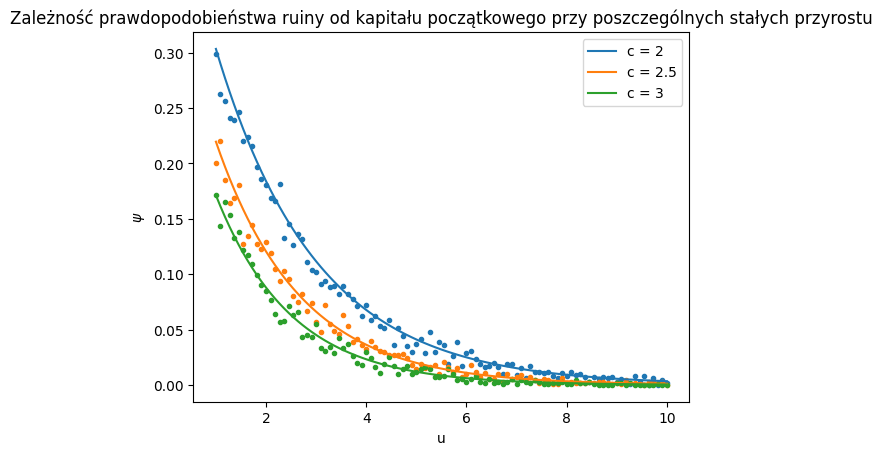

In [36]:
T=10
n=10**3
c_0 = 2
c_1 = 2.5
c_2 = 3

#obliczamy wartości pollaczka
u = np.linspace(1,10,100)
test1 = np.zeros(len(u))
test2 = np.zeros(len(u))
test3 = np.zeros(len(u))
for i in range(len(u)):
    test1[i] = pol_chin(c_0,u[i])
    test2[i] = pol_chin(c_1,u[i])
    test3[i] = pol_chin(c_2,u[i])

plot = plt.subplot()
plt.plot(u,test1, label="c = 2")
plt.plot(u,test2, label="c = 2.5")
plt.plot(u,test3, label="c = 3")

#obliczamy empirycznie
draw_const_c(T,n,u,c_0)
draw_const_c(T,n,u,c_1)
draw_const_c(T,n,u,c_2)
plot.set_xlabel("u")
plot.set_ylabel("$\psi$")
plt.title("Zależność prawdopodobieństwa ruiny od kapitału początkowego przy poszczególnych stałych przyrostu")
plt.legend()
plt.show()

Widać tutaj, że im większe są $u$ oraz $c$, tym mniejsza jest szansa na ruinę. Można stąd łatwo zdobyc informacje jak dobrać $u$ i $c$ aby uzyskać dane prawdopodobieństwo ruiny.

Podobne zachowanie się prawdopodobieństwa zbadamy dla stałych kapitałów początkowych. Weźmiemu $u=\{4,6,8\}$ oraz c będący 100-elementowych wektorem liczb z przedziału $[2,10]$.

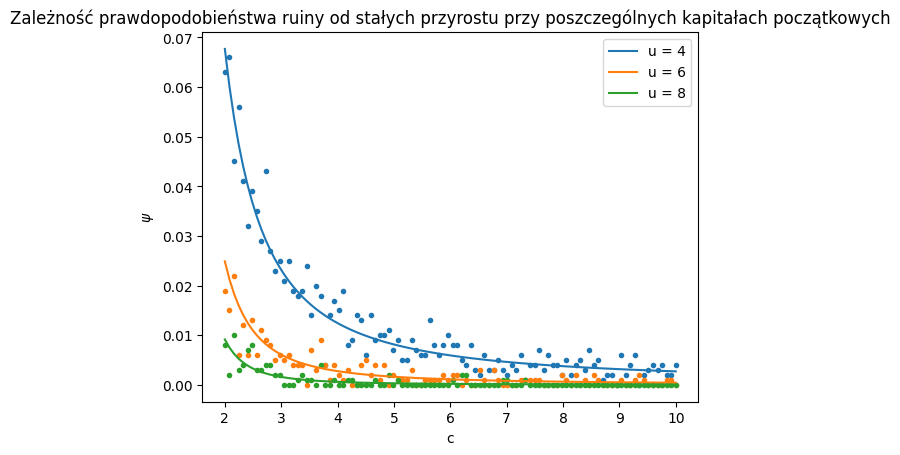

In [37]:
T=10
n=10**3
u_0 = 4
u_1 = 6
u_2 = 8

#obliczamy wartości pollaczka
c = np.linspace(2,10,100)
test1 = np.zeros(len(c))
test2 = np.zeros(len(c))
test3 = np.zeros(len(c))
for i in range(len(c)):
    test1[i] = pol_chin(c[i],u_0)
    test2[i] = pol_chin(c[i],u_1)
    test3[i] = pol_chin(c[i],u_2)

plot = plt.subplot()
plt.plot(c,test1, label="u = 4")
plt.plot(c,test2, label="u = 6")
plt.plot(c,test3, label="u = 8")

#obliczamy empirycznie
draw_const_u(T,n,u_0,c)
draw_const_u(T,n,u_1,c)
draw_const_u(T,n,u_2,c)
plot.set_xlabel("c")
plot.set_ylabel("$\psi$")
plt.title("Zależność prawdopodobieństwa ruiny od stałych przyrostu przy poszczególnych kapitałach początkowych")
plt.legend()
plt.show()

Jako kolejne wprowadzimy funkcję odwrotną do wzoru Pollaczka-Chinczyna, która dla pewnych $u$ i $\psi$ wyznaczy $c$.

In [57]:
def invert_c(u,psi,lmbd = 1, eta=1):
    """
    Calculates the value of c needed to achieve the probability of ruin psi at the given u
    """
    return np.real(lmbd*u/(lambertw(u*psi*np.exp(u/eta)/eta)))

Będziemy chcieli przetestować jej działanie. W tym celu za jej pomocą wyznaczymy wartości $c$, które potem wstawimy do wzoru Pollaczka-Chinczyna, aby sprawdzić czy dadzą początkowe wartości.

In [62]:
#prezentacja działania funkcji odwrotnej

#obliczamy wartości c do osiągnięcia danego prawdop.
u=3
psi_1 = 0.1
psi_2 = 0.05
psi_3 = 0.025
print("Wartości prawdopodobieństwa od funkcji odwrotnej")
print("psi_1 = {}".format(psi_1))
print("psi_2 = {}".format(psi_2))
print("psi_3 = {}".format(psi_3))


c_result_1 = invert_c(u,psi_1)
c_result_2 = invert_c(u,psi_2)
c_result_3 = invert_c(u,psi_3)

print("Uzyskane wartości c")
print("c_1 = {}".format(c_result_1))
print("c_2 = {}".format(c_result_2))
print("c_3 = {}".format(c_result_3))

print("Wyniki wzoru Pollaczka-Chinczyna dla uzyskanych c")
print(pol_chin(c_result_1,3))
print(pol_chin(c_result_2,3))
print(pol_chin(c_result_3,3))

Wartości prawdopodobieństwa od funkcji odwrotnej
psi_1 = 0.1
psi_2 = 0.05
psi_3 = 0.025
Uzyskane wartości c
c_1 = 2.090710523553798
c_2 = 2.851451304221464
c_3 = 4.122818429760326
Wyniki wzoru Pollaczka-Chinczyna dla uzyskanych c
0.10000000000000002
0.04999999999999999
0.025


Jak widać otrzymaliśmy te same prawdopodobieństwa co na początku. Zatem będąc pewnymi działania naszej funkcji odwrotnej możemy wygenerować wykresy zależności $c$ od $u$ w celu uzyskania określonego już wyżej prawdopodobieństwa ruiny.

### niżej wrzucam kod, który jeszcze opisze, po prostu chce to mieć na gicie jakby coś się miało popsuć, to będzie takie minimum

In [63]:
def find_all_c(T,n,u_vector,c_test,psi,lmbd=1,eta=1):
    #funkcja jest malejąca, więc zaczniemy szukać od najwyższej wartości
    #przygotować indeksy
    u_index = 0 #odpowiada za indeks talicy u jak i index obecnie szukanego c
    c_index = 0 #odpowiada za indeks obecnie sprawdzanej wartości c z tablicy c_test

    c_found = np.zeros(len(u_vector))
    for i in range(1,len(c_test)+1):
        psi_test = ruin(T,n,u[u_index],c_test[-i],lmbd,eta)
        # print(psi_test)
        if psi_test > psi:
            # print(c_test)
            # print(c_test[-i])
            c_found[u_index] = c_test[-i]
            u_index += 1
            break
    c_test = np.flip(np.linspace(min(c_test),c_found[0],len(c_test))) #tworzymy nowy wektor testowy dla c, który ma bardziej konkrenty zasięg
    
    while u_index < len(u_vector):
        # if c_index == len(c_test):
        #     # print(min(c_test),c_found[u_index-1])
        #     # c_test = np.flip(np.linspace(min(c_test),c_found[u_index-1],len(c_test)))
        #     print("going_back")
        #     c_index = c_index-2

        psi_test = ruin(T,n,u[u_index],c_test[c_index],lmbd,eta)
        if psi_test > psi:
            # print(c_index)
            # print(u_index)
            c_found[u_index] = c_test[c_index]
            u_index += 1
        else:
            c_index += 1
            if c_index == len(c_test):
                break
    # print(c_found[u_index-1])
    for i in range(u_index,len(u_vector)):
        c_found[i] = c_found[u_index-1]

    return c_found

In [64]:
T = 10
u = np.linspace(2,10,100)
c_test = np.linspace(1.5,10,100)
n=10**3                     #dokładność liczenia prawdop. metodą monte carlo

c_1_empiric = find_all_c(T,n,u,c_test,psi_1)
c_2_empiric = find_all_c(T,n,u,c_test,psi_2)
c_3_empiric = find_all_c(T,n,u,c_test,psi_3)

c_1 = invert_c(u,psi_1) #wartości dla psi = 0.2
c_2 = invert_c(u,psi_2) #wartości dla psi = 0.1
c_3 = invert_c(u,psi_3) #wartości dla psi = 0.05

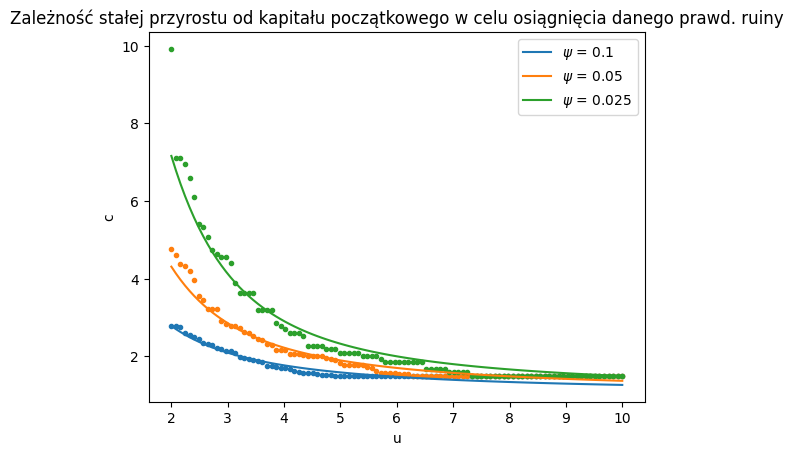

In [65]:
plot = plt.subplot()
plt.plot(u,c_1, label="$\psi$ = 0.1")
plt.scatter(u,c_1_empiric,marker=".")
plt.plot(u,c_2, label="$\psi$ = 0.05")
plt.scatter(u,c_2_empiric,marker=".")
plt.plot(u,c_3, label="$\psi$ = 0.025")
plt.scatter(u,c_3_empiric,marker=".")

plot.set_xlabel("u")
plot.set_ylabel("c")
plt.title("Zależność stałej przyrostu od kapitału początkowego w celu osiągnięcia danego prawd. ruiny")
plt.legend()
plt.show()

Na tym wykresie widać jak powinny być od siebie zależne $u$ oraz $c$, aby otrzymać oczekiwane prawdopodobieństwo ruiny. Dla przykładu, chcąc osiągnąć prawdopodobieństwo ruiny równe $\psi = 0.05$, należy ustalić kapitał początkowy $u = 2$ oraz stałą przyrostu $c = 6$, lub można także ustalić $u=6$ i $ c=2 $.

# Zadanie 6:

## Treść zadania

Lorem ipsum

<br>

## Rozwiązanie


Ciągła zmienna losowa X ma rozkład arcusa sinusa (X ∼ Arcsine), gdy jej funkcja gęstości prawdopodobieństwa pX ma postać:

$$
p_X(x) = \frac{ 1 }{ \pi \sqrt{x(1 - x)} }\mathbb{1}_{(0, 1)}(x).
$$

Dystrybuanta tej zmiennej jest wtedy równa

$$
F_X(x) = 
\begin{cases}
0, \ \ \  x \lt 0, \\
\frac{2}{\pi}\arcsin(\sqrt{x}), \ \ \   x \in [0, 1], \\
1, \ \ \   x \gt 1.
\end{cases}
$$

Zaimplementujemy ten rozkład jako klasę:

In [42]:
class Arcsine:
    """
    Arcsine distribution
    @doc https://en.wikipedia.org/wiki/Arcsine_distribution
    """

    def pdf(self, x):
        """
        Probability density function at x.
        """
        p_x = np.zeros_like(x)

        # correct indexes are position for x \in [0,1]
        correct_indexes = (x > 0) & (x < 1)

        root = np.sqrt(x[correct_indexes] * (1 - x[correct_indexes]))
        p_x[correct_indexes] = 1 / (np.pi * root)

        return p_x

    def cdf(self, x):
        """
        Cumulative distribution function at x.
        """
        F_x = np.zeros_like(x)
        F_x[x >= 1] = 1

        # correct indexes are position for x \in [0,1]
        correct_indexes = (x > 0) & (x < 1)

        x_root = np.sqrt(x[correct_indexes])
        F_x[correct_indexes] = (2 / np.pi) * np.arcsin(x_root)

        return F_x

arcsine = Arcsine()

### Proces Wieniera $W_t$

Kolejnym istotnym zagadnieniem dla realizacji tego zadania jest proces Wieniera $W_t$. Scharakteryzowany jest on przez następujące ważne dla nas <a href="https://en.wikipedia.org/wiki/Wiener_process">własności</a>:

- $W_0 = 0$,
- $W_{t + u} - W_t ~ N(0, \mu)$

Zgodnie z tymi założeniami zaimplementujmy go

In [43]:
def get_wiener_process(T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)

    dW = np.random.normal(0, np.sqrt(dt), N)
    W = np.zeros(N+1)
    
    W[1:] = np.cumsum(dW)
    
    return W, t

Posiadając takie przygotowanie możemy przejść do realizacji właściwej treści zadania, czyli weryfikacji trzech praw arcusa sinusa.

### Weryfikacja praw arcusa sinusa

#### Pierwsze prawo arcusa sinusa

$$
T_+ = \lambda ({ t \in [0, 1][W_t > 0] }) \sim \mathrm{Arcsine}
$$

gdzie $\lambda$ to miara Lebesgue’a. Oznacza to, że czas spędzony przez proces Wienera powyżej osi OX na odcinku [0,1] ma rozkład arcusa sinusa.

Rozpoczniemy od implementacji funkcji, która pozwoli nam wyliczyć $T_+$

In [44]:
def get_wiener_time_above_zero(W, t):
    W_above = W > 0
    dt = t[1] - t[0]

    return W_above.sum() * dt

Chcąc dokonać weryfikacji podanego prawa rozpoczniemy od określenia konfiguracji naszego zadania (te same parametry wykorzystamy również dla weryfikacji późniejszych praw).

In [45]:
T = 1
time_steps_count = 1_000
monte_carlo_steps_count = 10_000

Posiadając tak przygotowane zaplecze kodowe możemy z użyciem metody Monte Carlo sprawdzić pierwsze prawo arcusa sinusa.

In [46]:
T_plus = np.zeros(monte_carlo_steps_count)

for index in range(monte_carlo_steps_count):
    W, t = get_wiener_process(T, time_steps_count)
    T_plus[index] = get_wiener_time_above_zero(W, t)

Tak posiadane dane możemy porównać wygodnie na wykresie wraz z rozkładem arcusa sinusa

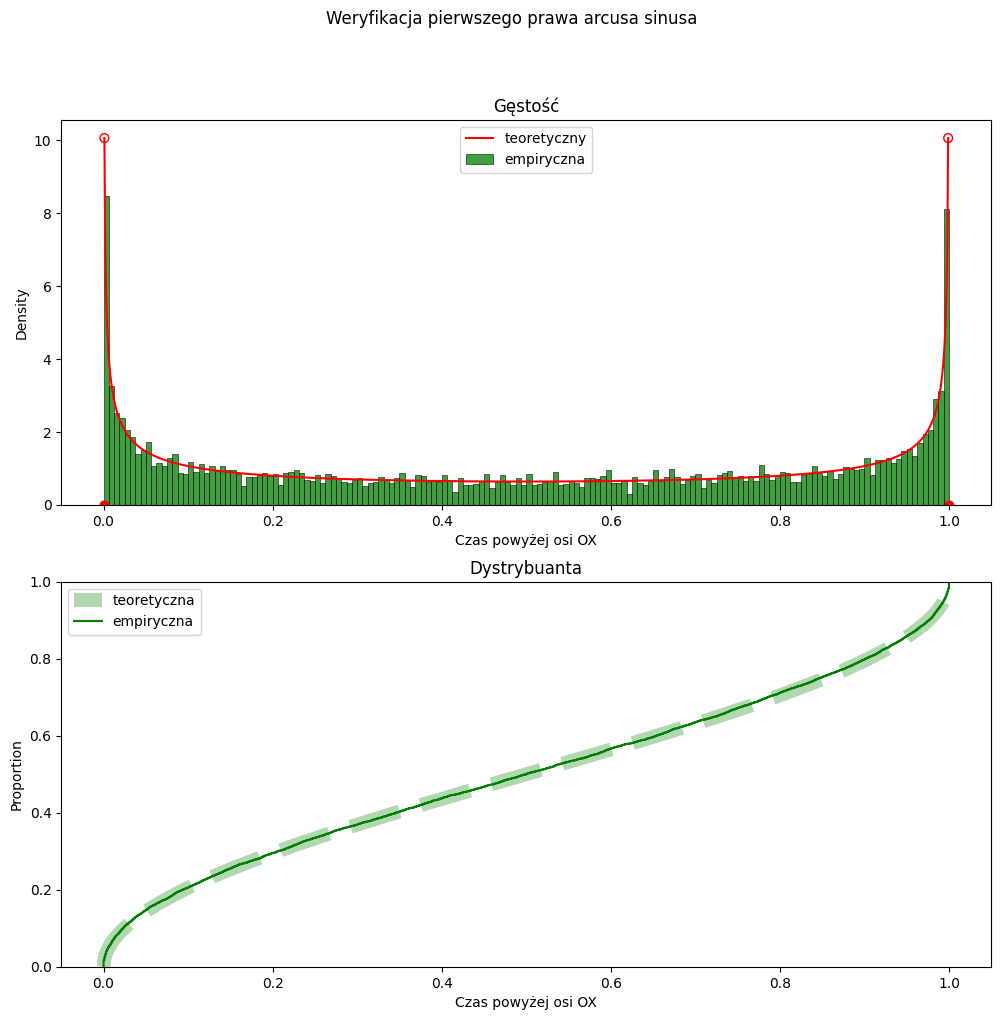

In [47]:
chart_x = np.linspace(np.min(T_plus), np.max(T_plus), time_steps_count)

plt.figure(figsize=(12, 11))

# Gęstość
plt.subplot(2, 1, 1)
plt.plot(chart_x[1:-1], arcsine.pdf(chart_x[1:-1]), 'r', label='teoretyczny')
sns.histplot(T_plus, stat="density", label="empiryczna", color='g', bins=160)
plt.scatter(x=[chart_x[1], chart_x[-2]], y=[arcsine.pdf(chart_x[1]), arcsine.pdf(chart_x[-2])], facecolors='none', edgecolors='r', s=40)
plt.scatter(x=[chart_x[0], chart_x[-1]], y=[arcsine.pdf(chart_x[0]), arcsine.pdf(chart_x[-1])], c='r', s=40)
plt.xlabel('Czas powyżej osi OX')
plt.title('Gęstość')
plt.legend()

# Dystrybuanta
plt.subplot(2, 1, 2)
plt.plot(chart_x, arcsine.cdf(chart_x), '--', linewidth=10, c='green', alpha=0.3, label="teoretyczna")
sns.ecdfplot(T_plus, label='empiryczna', c='green')
plt.xlabel('Czas powyżej osi OX')
plt.title('Dystrybuanta')
plt.legend()

plt.suptitle("Weryfikacja pierwszego prawa arcusa sinusa")

plt.show()

#### Drugie prawo arcusa sinusa

$$
L = \sup{ \{ t \in [0, 1][W_t = 0] \} } \sim \mathrm{Arcsine}
$$

Inaczej mówiąc, ostatni moment uderzenia procesu Wienera na odcinku [0,1] w oś OX ma rozkład arcusa sinusa.

Rozpoczniemy od implementacji funkcji, która pozwoli nam wyliczyć $L$

In [48]:
def last_time_process_hit(W, t):
    last_hist = 0

    sign = 1
    dt = t[1] - t[0]

    for index, W_i in enumerate(W):
        new_sign = 1 if W_i >= 0 else -1
        if new_sign != sign:
            last_hist = (index - 1) * dt + dt / 2
            sign = new_sign
    
    return last_hist

Ponieważ generowany przez nas proces Wieniera jest dyskretyzowany przez czas, zamiast sprawdzać czy nasza sprawdzana wartość $W_t = 0$, sprawdzamy czy wartości $W_t$ i $W_{t - 1}$ mają różne znaki. Jeśli tak to w symulacji procesu ciągłego Wieniera wiemy z twierdzenia Darboux, że odbył się moment uderzenia procesu Wieniera w oś OX. W tej implementacji zakładamy, że ten moment to $\frac{t_n + t_{n-1}}{2}$, natomiast przyjęty może zostać dowolny punkt $\in [t_{n - 1}, t_n]$ zgodnie z podanym twierdzeniem Darboux. Dla dostatecznie dużej dyskretyzacji czasu dobór punktu z tego przedziału nie pownien mieć znaczenia.

Posiadając tak przygotowane zaplecze kodowe możemy z użyciem metody Monte Carlo sprawdzić drugie prawo arcusa sinusa.

In [49]:
L = np.zeros(monte_carlo_steps_count)

for index in range(monte_carlo_steps_count):
    W, t = get_wiener_process(T, time_steps_count)
    L[index] = get_wiener_time_above_zero(W, t)

Tak posiadane dane możemy porównać wygodnie na wykresie wraz z rozkładem arcusa sinusa

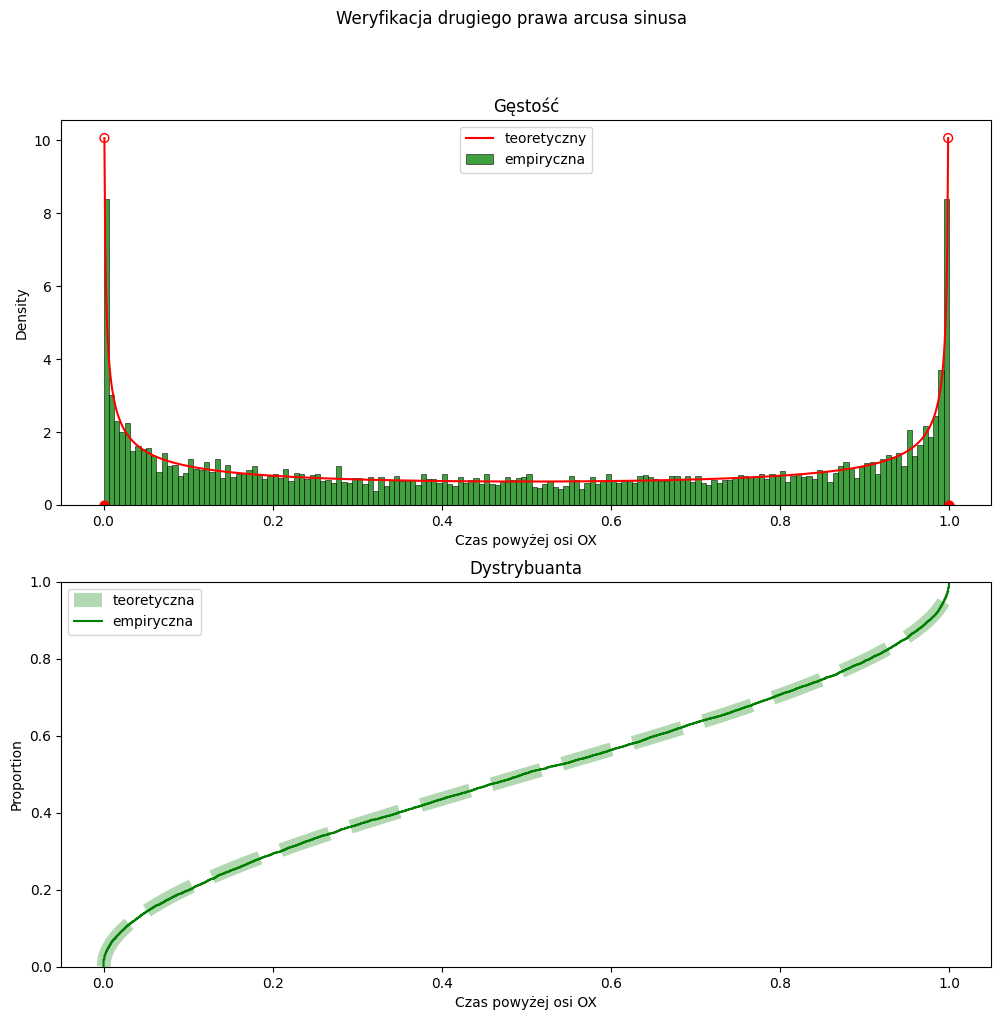

In [50]:
chart_x = np.linspace(np.min(L), np.max(L), time_steps_count)

plt.figure(figsize=(12, 11))

# Gęstość
plt.subplot(2, 1, 1)
plt.plot(chart_x[1:-1], arcsine.pdf(chart_x[1:-1]), 'r', label='teoretyczny')
sns.histplot(L, stat="density", label="empiryczna", color='g', bins=160)
plt.scatter(x=[chart_x[1], chart_x[-2]], y=[arcsine.pdf(chart_x[1]), arcsine.pdf(chart_x[-2])], facecolors='none', edgecolors='r', s=40)
plt.scatter(x=[chart_x[0], chart_x[-1]], y=[arcsine.pdf(chart_x[0]), arcsine.pdf(chart_x[-1])], c='r', s=40)
plt.xlabel('Czas powyżej osi OX')
plt.title('Gęstość')
plt.legend()

# Dystrybuanta
plt.subplot(2, 1, 2)
plt.plot(chart_x, arcsine.cdf(chart_x), '--', linewidth=10, c='green', alpha=0.3, label="teoretyczna")
sns.ecdfplot(L, label='empiryczna', c='green')
plt.xlabel('Czas powyżej osi OX')
plt.title('Dystrybuanta')
plt.legend()

plt.suptitle("Weryfikacja drugiego prawa arcusa sinusa")

plt.show()

#### Trzecie prawo arcusa sinusa

$$
W_M = \sup{ \{ W_t | t \in [0, 1] \} } \sim \mathrm{Arcsine}.
$$

Oznacza to, że moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0,1]
ma rozkład arcusa sinusa.

Rozpoczniemy od implementacji funkcji, która pozwoli nam wyliczyć $L$

In [51]:
def time_of_max_value(W, t):
    return t[np.argmax(W)]

Używamy metody Monte Carlo

In [52]:
W_M = np.zeros(monte_carlo_steps_count)

for index in range(monte_carlo_steps_count):
    W, t = get_wiener_process(T, time_steps_count)
    W_M[index] = get_wiener_time_above_zero(W, t)

Tak posiadane dane możemy porównać wygodnie na wykresie wraz z rozkładem arcusa sinusa

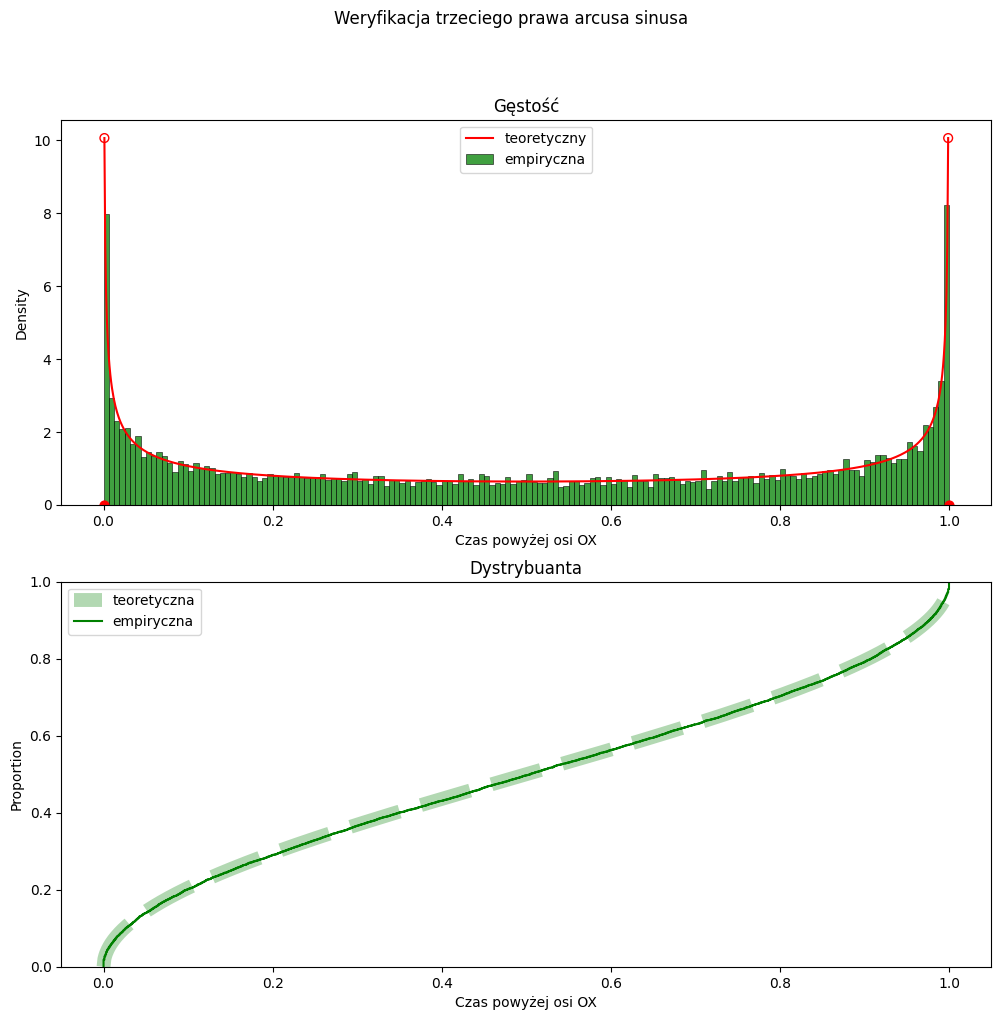

In [53]:
chart_x = np.linspace(np.min(W_M), np.max(W_M), time_steps_count)

plt.figure(figsize=(12, 11))

# Gęstość
plt.subplot(2, 1, 1)
plt.plot(chart_x[1:-1], arcsine.pdf(chart_x[1:-1]), 'r', label='teoretyczny')
sns.histplot(W_M, stat="density", label="empiryczna", color='g', bins=160)
plt.scatter(x=[chart_x[1], chart_x[-2]], y=[arcsine.pdf(chart_x[1]), arcsine.pdf(chart_x[-2])], facecolors='none', edgecolors='r', s=40)
plt.scatter(x=[chart_x[0], chart_x[-1]], y=[arcsine.pdf(chart_x[0]), arcsine.pdf(chart_x[-1])], c='r', s=40)
plt.xlabel('Czas powyżej osi OX')
plt.title('Gęstość')
plt.legend()

# Dystrybuanta
plt.subplot(2, 1, 2)
plt.plot(chart_x, arcsine.cdf(chart_x), '--', linewidth=10, c='green', alpha=0.3, label="teoretyczna")
sns.ecdfplot(W_M, label='empiryczna', c='green')
plt.xlabel('Czas powyżej osi OX')
plt.title('Dystrybuanta')
plt.legend()

plt.suptitle("Weryfikacja trzeciego prawa arcusa sinusa")

plt.show()